# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Dataset  


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




In [406]:
!pwd

/Users/zashabenites/Documents/IU/csci_p_556/project_on_own


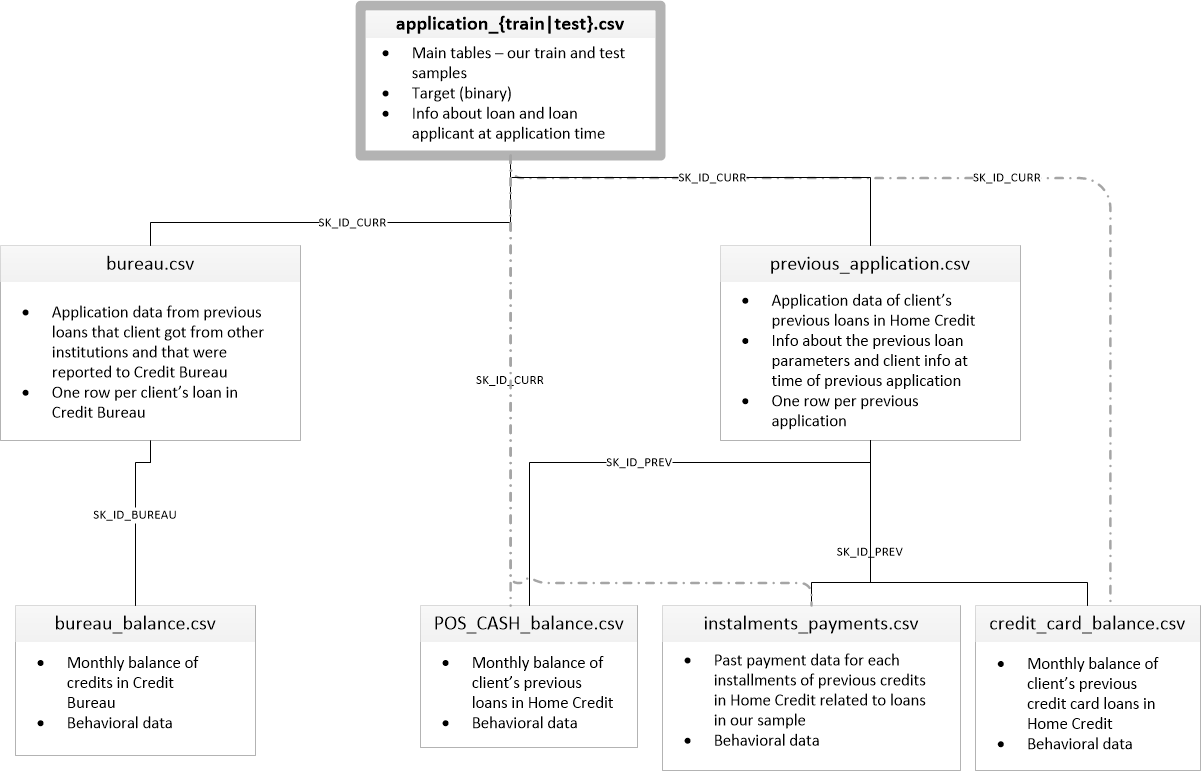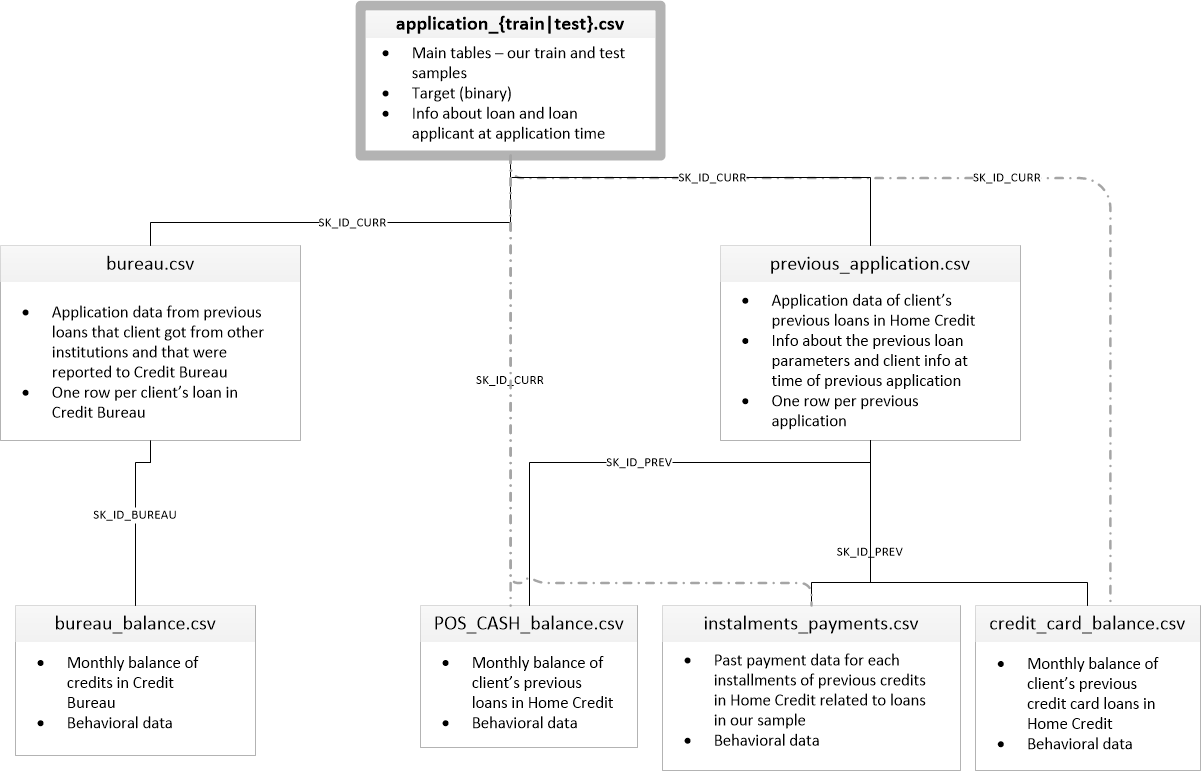

### Imports

In [96]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import time
from scipy.special import rel_entr
 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.compose import ColumnTransformer
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
warnings.filterwarnings('ignore')

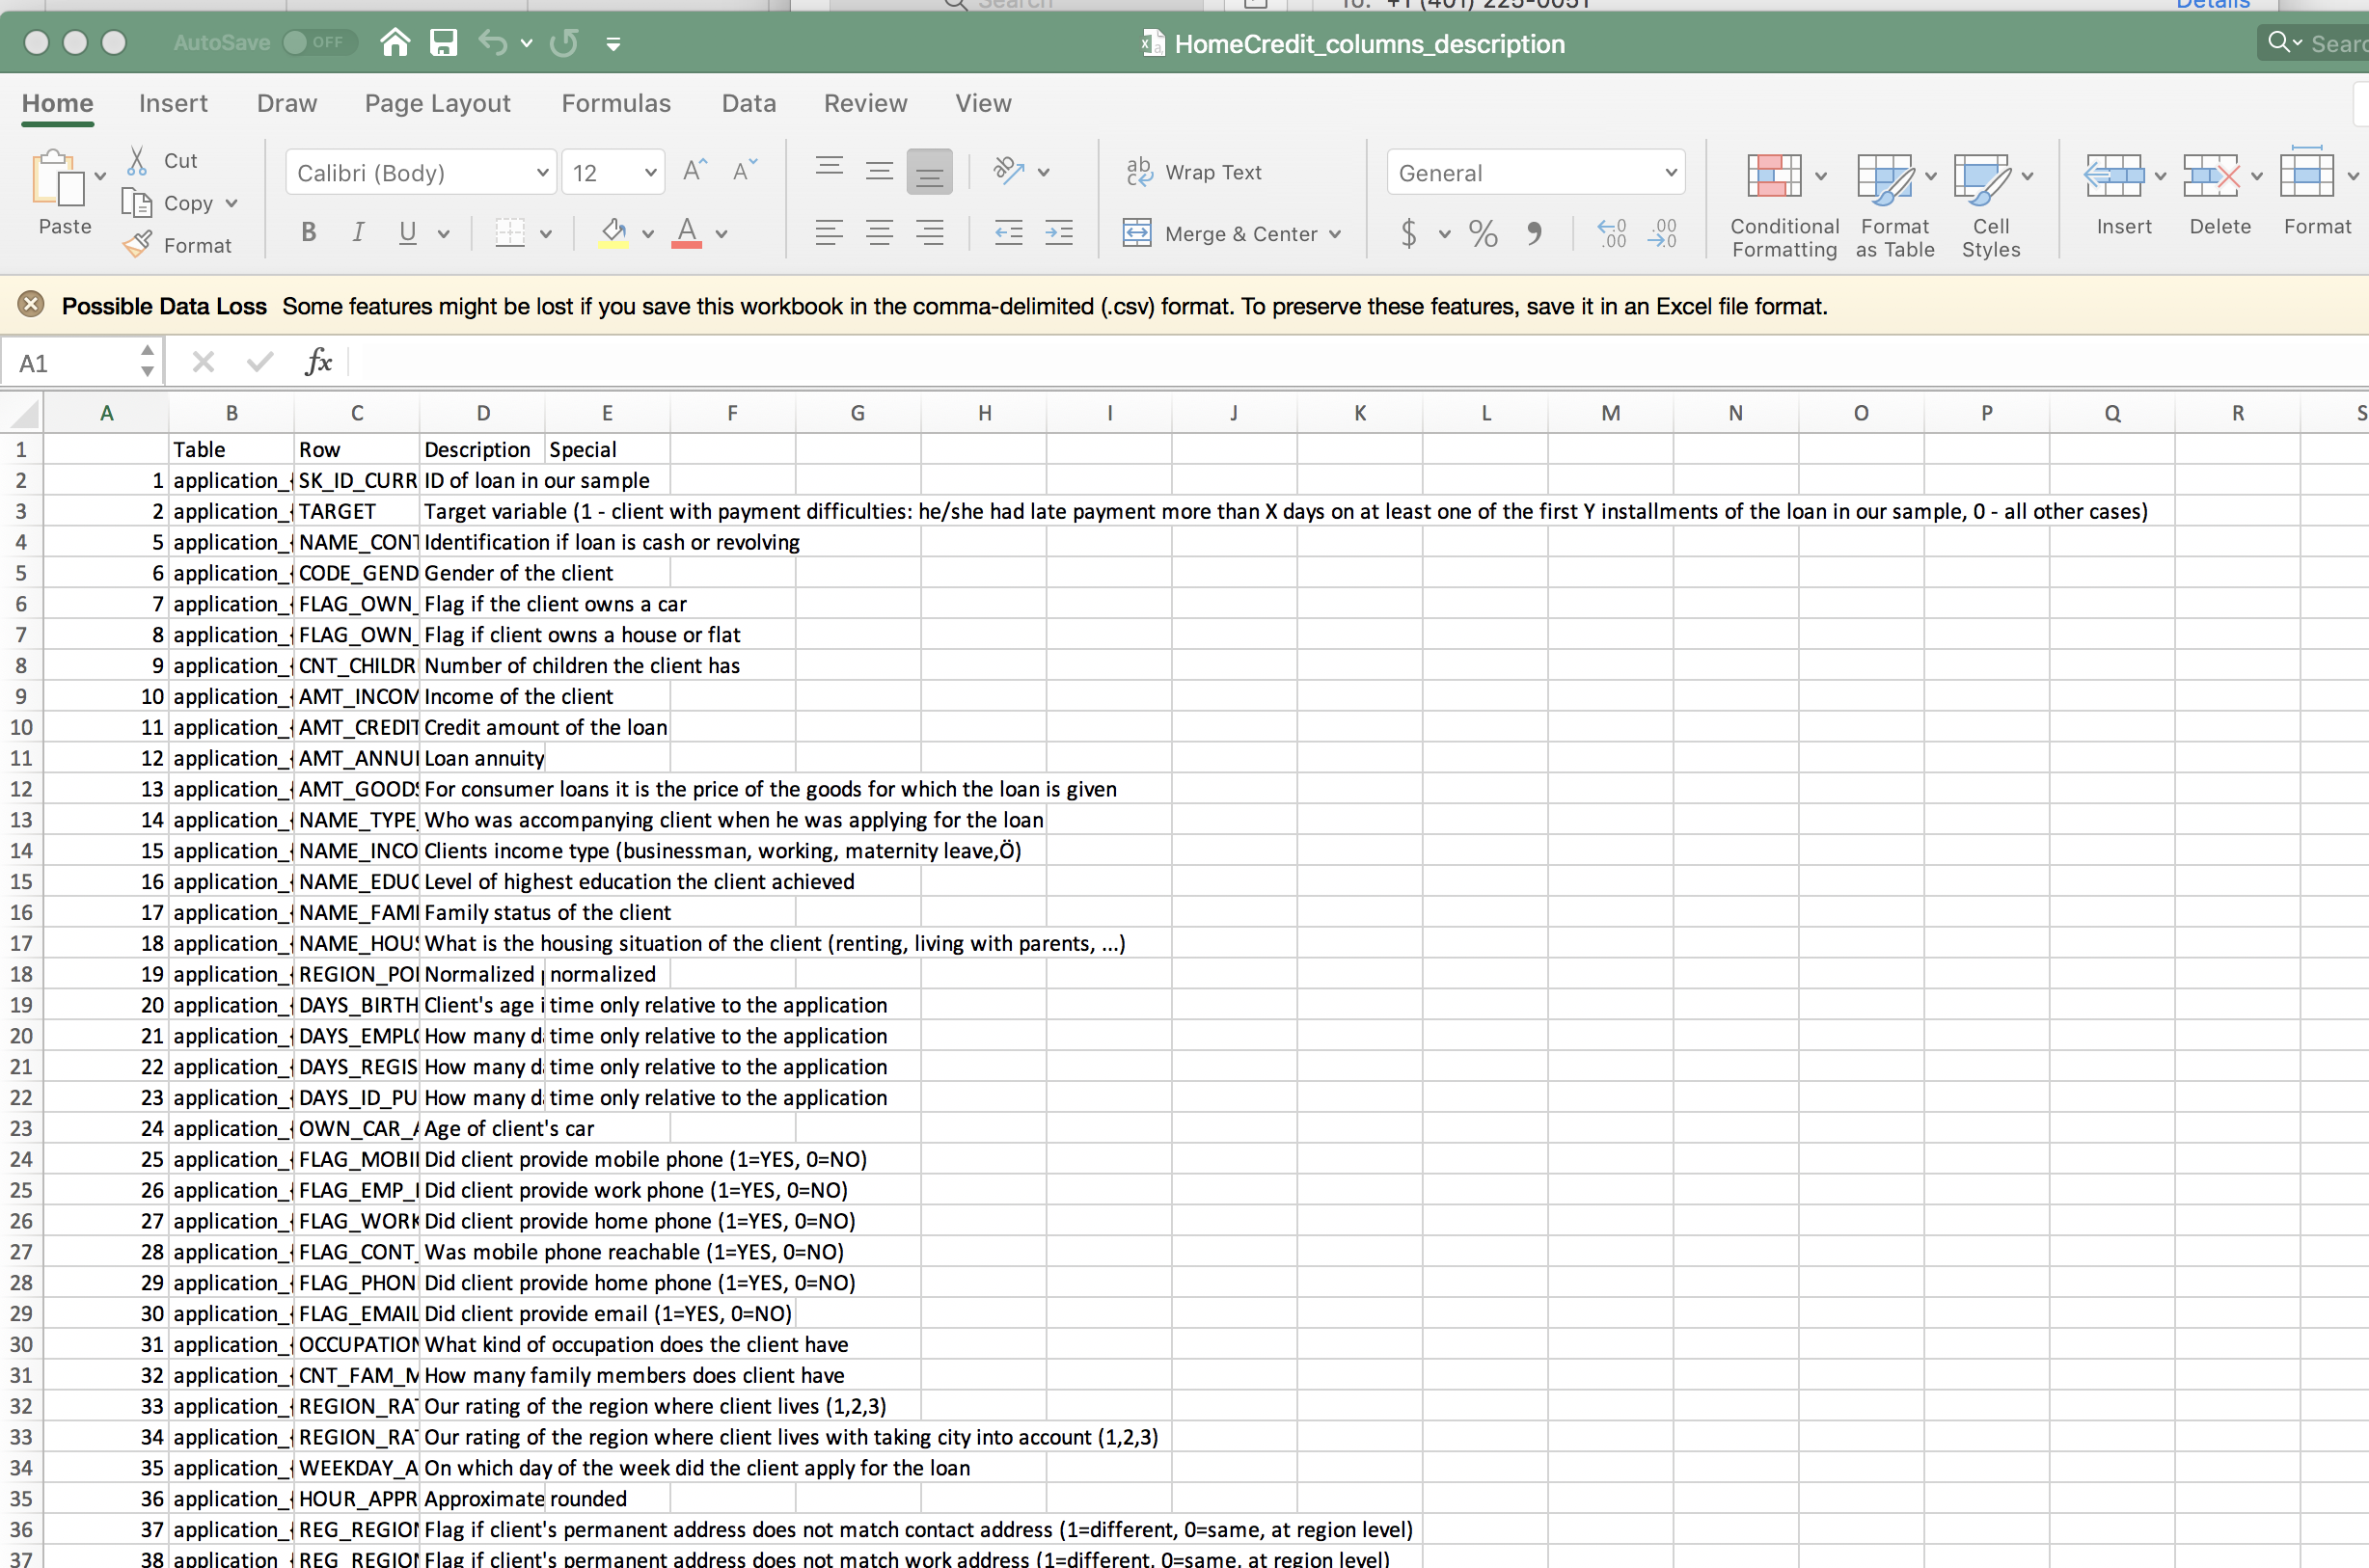

# About our Datasets

In [405]:
#folder='datasets' # where you store the datsets
!pwd

/Users/zashabenites/Documents/IU/csci_p_556/project_on_own


In [4]:
datasets= {}
curDir= os.getcwd()
datasets_path = os.path.join(curDir, folder)
datasetsn=os.listdir(datasets_path)
 
datasetsn.remove('HomeCredit_columns_description.csv')
for d in datasetsn:
    n= os.path.splitext(d)[0]
    
    datasets[n] = pd.read_csv(os.path.join(datasets_path, d))

print(datasets.keys())

dict_keys(['application_test', 'POS_CASH_balance', 'credit_card_balance', 'installments_payments', 'application_train', 'bureau', 'previous_application', 'bureau_balance', 'sample_submission'])


### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [8]:
ds_name = 'application_test'
datasets['application_test'].head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [9]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_test        : [     48,744, 121]
dataset POS_CASH_balance        : [ 10,001,358, 8]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset application_train       : [    307,511, 122]
dataset bureau                  : [  1,716,428, 17]
dataset previous_application    : [  1,670,214, 37]
dataset bureau_balance          : [ 27,299,925, 3]
dataset sample_submission       : [     48,744, 2]


# Exploratory Data Analysis

## Distribution of the target column 

Number of customers who will not repay the loan on time:  24825 , ( 8.072881945686495 %)
Number of customers who will repay the loan on time:  282686 , ( 91.92711805431351 %)


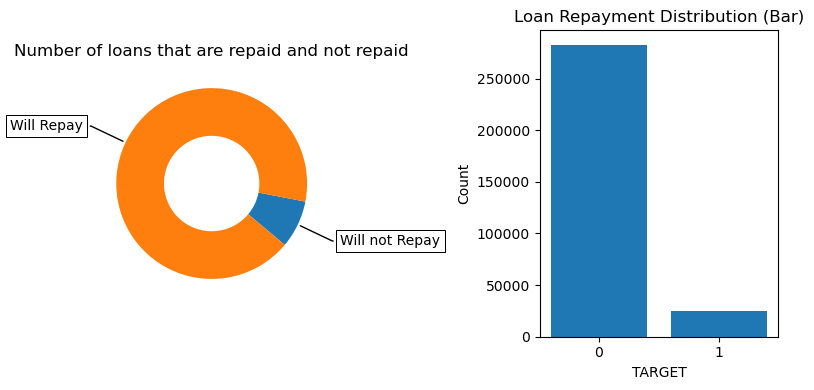

In [12]:
# Refer :- https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

y_value_counts = datasets["application_train"]['TARGET'].value_counts()
print("Number of customers who will not repay the loan on time: ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of customers who will repay the loan on time: ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))  
recipe = ["Will not Repay", "Will Repay"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax[0].pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax[0].annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax[0].set_title("Number of loans that are repaid and not repaid")
target_counts = datasets["application_train"]['TARGET'].value_counts()
ax[1].bar(y_value_counts.index.astype(str), y_value_counts.values)
ax[1].set_title("Loan Repayment Distribution")
ax[1].set_xlabel("TARGET")
ax[1].set_ylabel("Count")


plt.tight_layout()
plt.show()


This is a highly imbalanced classification problem.
Using accuracy alone will be misleading so we will prioritize 
ROC-AUC, Recall, Micro and Macro Scores f-scores. If we define positive as the person repaying the not repaying the loan, recall is useful when false negatives (the model predicts the applicant will repay pay the loan but they actually did not) are costly. This is specially seful in our contest since we would rather be safer and classify a person as not repaying the loan  when they actually did than classify a person a person as having payed the loan when they actually did not. ROC-AUC measures how well the model distinguishes between classes at varius thresholds, helping compare the models regardless of class imbalance. Macro scoring is great for imbalanced datasets since it calculates scores for each class individually, making it great for evaluating performance without considering class imbalance. Meanwhile micro doesnt take into consideration the point's class and gives more weight to majority classes. Additionally we will also use stratified sampling techniques to our model can better learn to separate between classes.

__0: the loan was repaid__ or __1: the loan was not repaid__.  


#### **Recall (Sensitivity / True Positive Rate)**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

#### **ROC AUC (Area Under the ROC Curve)**
$$
\text{ROC AUC} = \int_{0}^{1} \text{TPR}(x) \, dx
$$

### Macro-Averaged Scores

**Macro Recall:**

$$
\text{Recall}_{\text{macro}} = \frac{1}{C} \sum_{i=1}^{C} \frac{TP_i}{TP_i + FN_i}
$$

**Macro F1 Score:**

$$
F1_{\text{macro}} = \frac{1}{C} \sum_{i=1}^{C} \frac{2 \cdot \text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
$$
 
---

**Where:**
- \( TP \): True Positives  
- \( FP \): False Positives  
- \( FN \): False Negatives
- \( C \): number of classes  
- \( TP_i \): True Positives for class \( i \)  
- \( FN_i \): False Negatives for class \( i \)  
- \( FP_i \): False Positives for class \( i \)  
- \( \text{TPR}(x) \): True Positive Rate as a function of FPR
- \( \text{Precision}_i = \frac{TP_i}{TP_i + FP_i} \)  
- \( \text{Recall}_i = \frac{TP_i}{TP_i + FN_i} \)

## Correlation with  the target column 

In [13]:
correlations = datasets["application_train"].select_dtypes(np.number).corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


## Insight
Since the default correlation method in Python is Pearson, which is suitable for linear relationships, and our target variable is ordinal, we also tested Spearman correlation for numeric features and ANOVA F-tests for categorical variables.

In [15]:
correlations = datasets["application_train"].select_dtypes(np.number).corr(method='spearman')['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.052535
OWN_CAR_AGE                    0.052932
DAYS_LAST_PHONE_CHANGE         0.053711
REGION_RATING_CLIENT           0.058909
REGION_RATING_CLIENT_W_CITY    0.060936
DAYS_BIRTH                     0.078328
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.166330
EXT_SOURCE_1      -0.151128
EXT_SOURCE_2      -0.147332
FLOORSMAX_AVG     -0.046178
FLOORSMAX_MEDI    -0.046019
FLOORSMAX_MODE    -0.045357
LIVINGAREA_AVG    -0.041631
LIVINGAREA_MEDI   -0.041140
TOTALAREA_MODE    -0.040071
LIVINGAREA_MODE   -0.039060
Name: TARGET, dtype: float64


In both Spearman and Pearson correlation analyses, the most negatively correlated features—indicating lower default risk—were the EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 variables. Most other features showed very weak correlations with the target, highlighting the importance of using non-linear modeling approaches such as decision trees or ensemble methods like LightGBM and XGBoost to capture more complex relationships in the data.



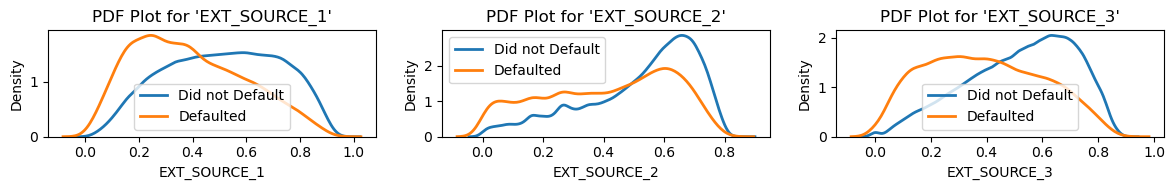

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = datasets["application_train"].copy()  # Adjust path as needed

# Plot EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
ext_sources = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
target_labels = {0: "Did not Default", 1: "Defaulted"}

fig, axs = plt.subplots(1,3, figsize= (12,2))
axs.flatten()

for i, col in enumerate(ext_sources):
    ax = axs[i]    
    # Plot density for each class of TARGET
    for target_value in [0, 1]:
        subset = df[df["TARGET"] == target_value][col].dropna()
        sns.kdeplot(subset, ax=ax, label=target_labels[target_value],
                        linewidth=2, fill=False, common_norm=False)
    
    ax.set_title(f"PDF Plot for '{col}'")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


In [157]:
# List of features to check
ext_sources = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

# Count missing values
missing_data = df[ext_sources].isnull().sum().to_frame(name="Missing Values")
missing_data["Total Rows"] = len(df)
missing_data["Missing Percentage"] = (missing_data["Missing Values"] / missing_data["Total Rows"]) * 100

print(missing_data)

              Missing Values  Total Rows  Missing Percentage
EXT_SOURCE_1          173378      307511           56.381073
EXT_SOURCE_2             660      307511            0.214626
EXT_SOURCE_3           60965      307511           19.825307


The EXT_SOURCE features are strong predictors of default, with lower scores consistently associated with higher risk. Kernel density plots show clear separation between repayers and defaulters, confirming their value. While EXT_SOURCE_2 is nearly complete, EXT_SOURCE_3 has moderate missingness (~20%), and EXT_SOURCE_1 is missing in over 56% of cases, requiring careful handling. 

In [398]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Extract categorical columns
cat_cols = datasets["application_train"].select_dtypes(include='object').columns

# Encode categorical variables
encoded_df = pd.DataFrame()
for col in cat_cols:
    le = LabelEncoder()
    datasets["application_train"][col] = datasets["application_train"][col].fillna("Missing")
    encoded_df[col] = le.fit_transform(datasets["application_train"][col])

# Perform ANOVA F-test
f_values, p_values = f_classif(encoded_df, datasets["application_train"]["TARGET"])

# Create result DataFrame
anova_results = pd.DataFrame({
    "Feature": encoded_df.columns,
    "F_value": f_values,
    "p_value": p_values
})

# Filter for significant features (p < 0.05)
significant_features = anova_results[anova_results["p_value"] < 0.05].sort_values("F_value", ascending=False)

# Print significant features
print("✅ Significant categorical features (p < 0.05):")
print(significant_features.to_string(index=False))


✅ Significant categorical features (p < 0.05):
                   Feature    F_value       p_value
       NAME_EDUCATION_TYPE 922.808544 2.159263e-202
               CODE_GENDER 922.594003 2.403275e-202
          NAME_INCOME_TYPE 675.848098 7.750686e-149
       EMERGENCYSTATE_MODE 478.325477 5.958716e-106
            HOUSETYPE_MODE 407.746919  1.298687e-90
         NAME_HOUSING_TYPE 366.206391  1.398821e-81
        WALLSMATERIAL_MODE 317.093257  6.757120e-71
        NAME_CONTRACT_TYPE 293.815375  7.868765e-66
         ORGANIZATION_TYPE 291.335497  2.727219e-65
        FONDKAPREMONT_MODE 258.123529  4.647730e-58
              FLAG_OWN_CAR 146.894464  8.424063e-34
           NAME_TYPE_SUITE  25.644549  4.106896e-07
           FLAG_OWN_REALTY  11.625101  6.507605e-04
        NAME_FAMILY_STATUS   5.238197  2.209684e-02
WEEKDAY_APPR_PROCESS_START   4.924517  2.647893e-02


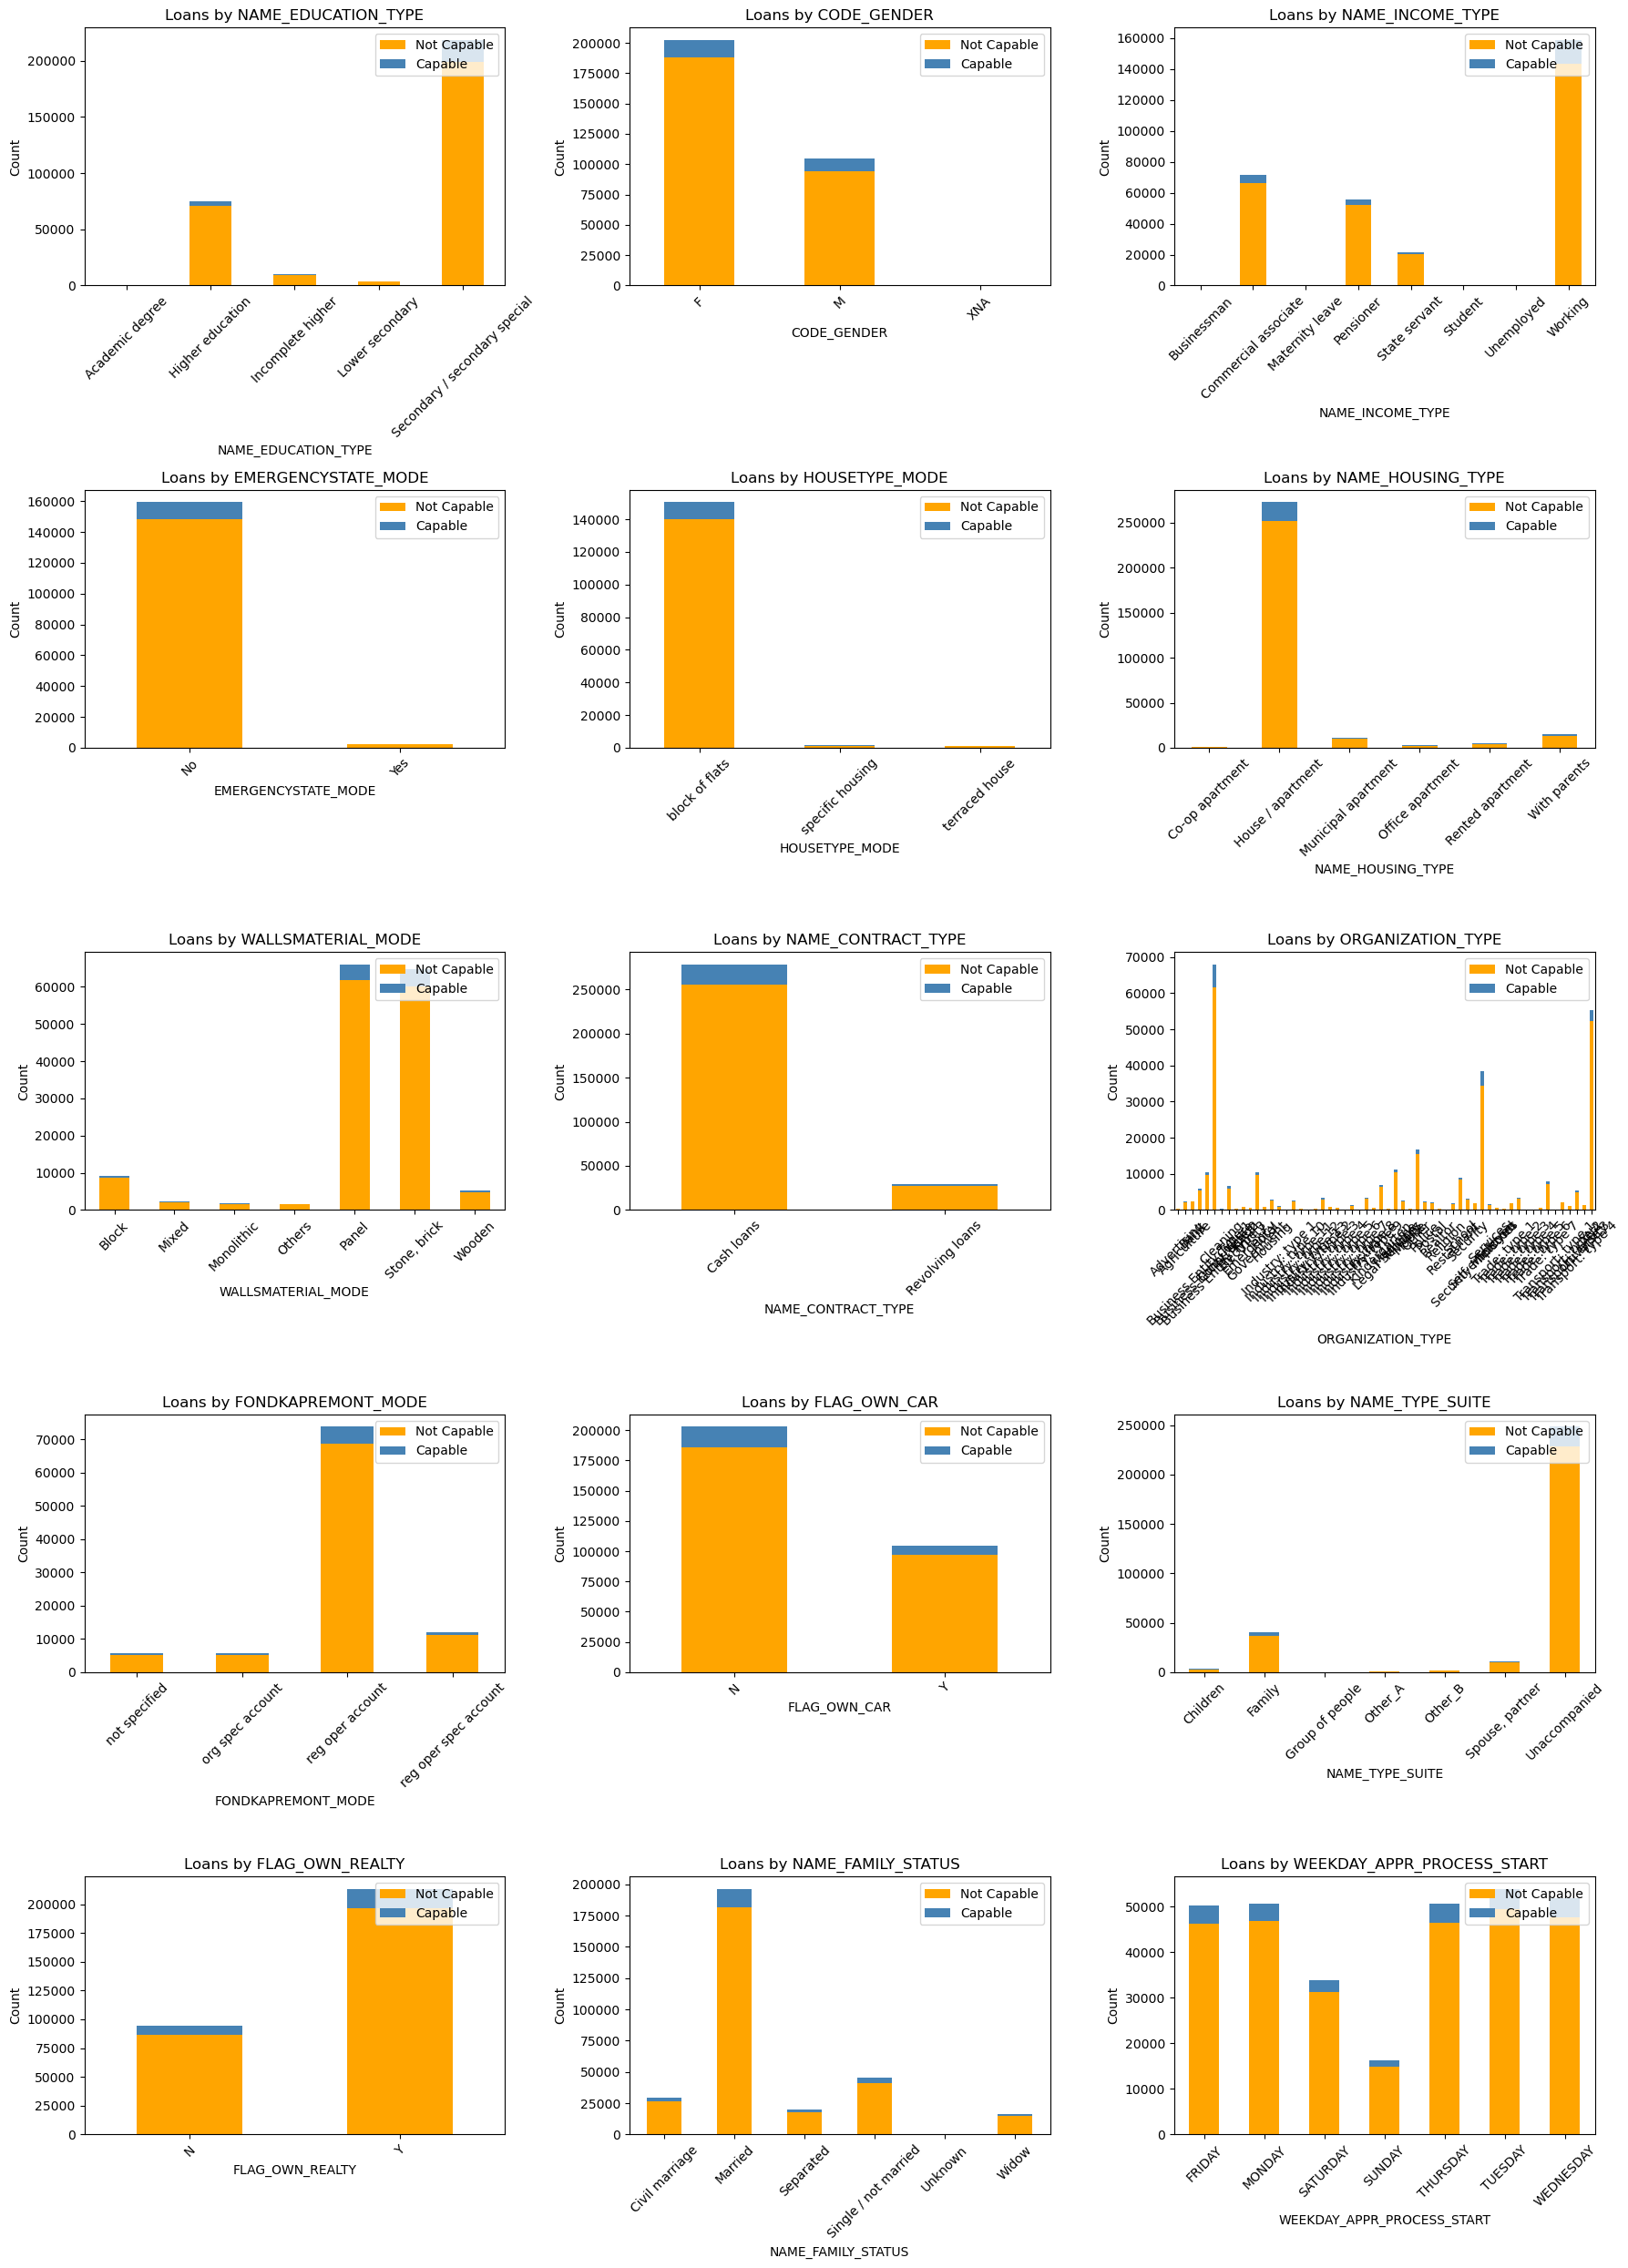

In [181]:
df = datasets["application_train"].copy()
significant_categorical_features = [
    "NAME_EDUCATION_TYPE", "CODE_GENDER", "NAME_INCOME_TYPE",
    "EMERGENCYSTATE_MODE", "HOUSETYPE_MODE", "NAME_HOUSING_TYPE",
    "WALLSMATERIAL_MODE", "NAME_CONTRACT_TYPE", "ORGANIZATION_TYPE",
    "FONDKAPREMONT_MODE", "FLAG_OWN_CAR", "NAME_TYPE_SUITE",
    "FLAG_OWN_REALTY", "NAME_FAMILY_STATUS", "WEEKDAY_APPR_PROCESS_START"
]

def plot_stacked_target_grid(data, features, target='TARGET', cols=3):
    rows = (len(features) + cols - 1) // cols  # ceil division
    fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axs = axs.flatten()

    for idx, feature in enumerate(features):
        ax = axs[idx]
   
        temp = data[[feature, target]].dropna()
        grouped = temp.groupby([feature, target]).size().unstack(fill_value=0)

        grouped.plot(kind='bar', stacked=True, ax=ax, color=['orange', 'steelblue'])
        ax.set_title(f"Loans by {feature}")
        ax.set_ylabel("Count")
        ax.set_xlabel(feature)
        ax.tick_params(axis='x', labelrotation=45)
        ax.legend(["Not Capable", "Capable"], loc='upper right')
 
    for i in range(len(features), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()
    """
    for feature in features:
        temp = data[[feature, target]].dropna()
        summary = temp.groupby(feature).agg(
            TARGET=('TARGET', 'sum'),
            total=(target, 'count')
        )
        summary["Avg"] = summary["TARGET"] / summary["total"]
        print(f"\nSummary for: {feature}")
        print(summary.reset_index().to_string(index=False))
        print("-" * 80)
     """
plot_stacked_target_grid(df, significant_categorical_features)



### Applicants Age 

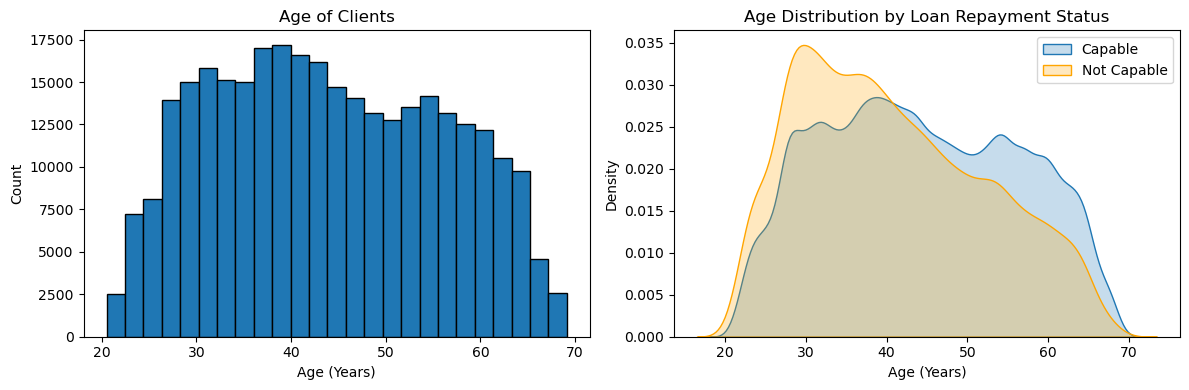

In [159]:
df["AGE"] = (-df["DAYS_BIRTH"]) / 365

fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].hist(df["AGE"], edgecolor='k', bins=25)
axs[0].set_title('Age of Clients')
axs[0].set_xlabel('Age (Years)')
axs[0].set_ylabel('Count')
 
sns.kdeplot(df[df["TARGET"] == 0]["AGE"].dropna(), ax= axs[1], label="Capable", fill=True)
sns.kdeplot(df[df["TARGET"] == 1]["AGE"].dropna(), ax= axs[1], label="Not Capable", fill=True, color="orange")
axs[1].set_title("Age Distribution by Loan Repayment Status")
axs[1].set_xlabel("Age (Years)")
axs[1].set_ylabel("Density")
axs[1].legend()
plt.tight_layout()
plt.show()

Most applicants are between 30 and 60 years old, with the peak around 35–40.

Younger applicants have higher default rates.

Age groups can be useful for risk segmentation.

### Applicants occupations

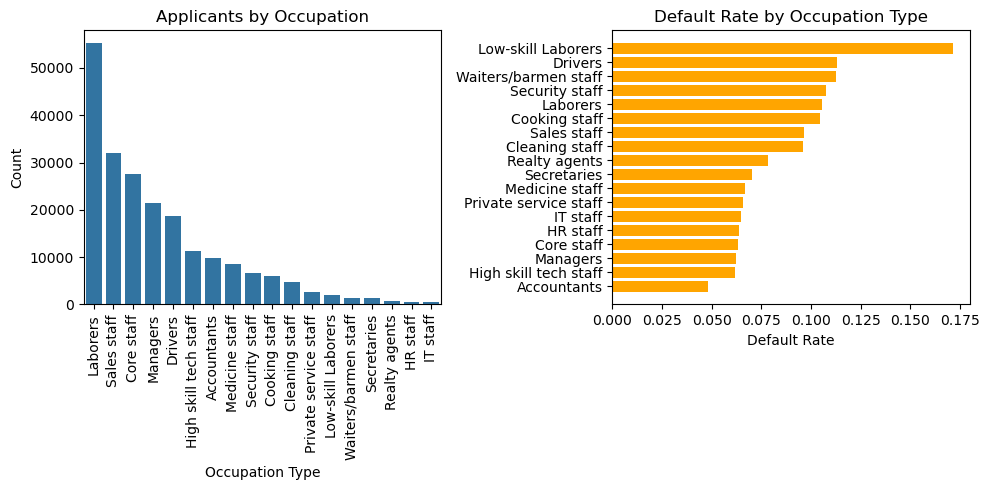

In [168]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='OCCUPATION_TYPE', data=df, ax=axs[0], order=df['OCCUPATION_TYPE'].value_counts().index)
axs[0].set_title('Applicants by Occupation')
axs[0].set_xlabel('Occupation Type')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)
 
axs[1].set_xlabel("Default Rate")
axs[1].barh(df_occ.index, df_occ.values, color='orange')
axs[1].set_title("Default Rate by Occupation Type")

plt.tight_layout()
plt.show()

31% of the occupation is missing. 
For missing values in OCCUPATION_TYPE, it might make sense to impute with a separate "Unknown" category or infer based on similar features like income or employment type.

### Application Income

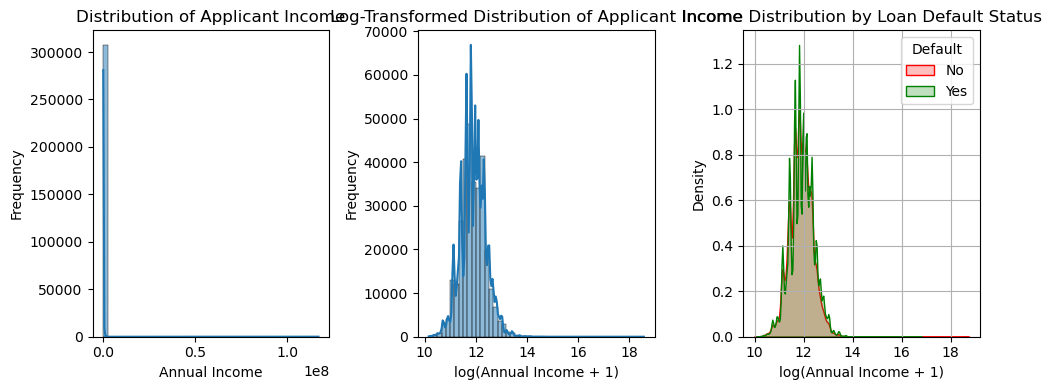

In [176]:
fig, axs = plt.subplots( 1,3, figsize=(10, 4) )

# Distribution of AMT_INCOME_TOTAL
 
sns.histplot(datasets["application_train"]["AMT_INCOME_TOTAL"],ax=axs[0], bins=50, kde=True)
axs[0].set_title("Distribution of Applicant Income")
axs[0].set_xlabel("Annual Income")
axs[0].set_ylabel("Frequency")

datasets["application_train"]["LOG_AMT_INCOME_TOTAL"] = np.log1p(datasets["application_train"]["AMT_INCOME_TOTAL"])

 
sns.histplot(datasets["application_train"]["LOG_AMT_INCOME_TOTAL"],ax=axs[1], bins=50, kde=True)
axs[1].set_title("Log-Transformed Distribution of Applicant Income")
axs[1].set_xlabel("log(Annual Income + 1)")
axs[1].set_ylabel("Frequency")
df = datasets["application_train"].copy()
df["LOG_AMT_INCOME_TOTAL"] = np.log1p(df["AMT_INCOME_TOTAL"])  # log(1 + x)
sns.kdeplot(
    data=df,
    x="LOG_AMT_INCOME_TOTAL",
    ax=axs[2],
    hue="TARGET",
    common_norm=False,
    fill=True,
    palette={0: "green", 1: "red"}
)

axs[2].set_title("Income Distribution by Loan Default Status")
axs[2].set_xlabel("log(Annual Income + 1)")
axs[2].set_ylabel("Density")
axs[2].legend(title="Default", labels=["No", "Yes"])
axs[2].grid()


plt.tight_layout()
plt.show()

hat spike on the left with a long tail suggests the AMT_INCOME_TOTAL feature has extreme outliers. Therefore we visulize the transformed version.

While the distributions largely overlap, the defaulted group tends to skew slightly left (lower income), which suggests a mild association between lower income and higher risk of default. However, it's not strongly separable, so income alone won't be a powerful predictor.

The interquartile ranges (boxes) are pretty similar, suggesting income alone may not be a strong differentiator, but it still carries some signal.

### Credit Amount

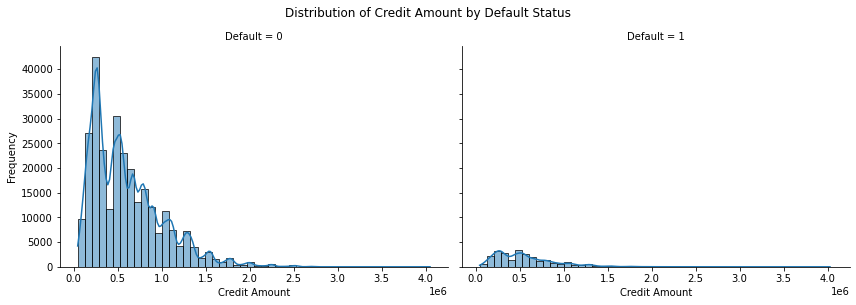

In [31]:
g = sns.FacetGrid(datasets["application_train"], col="TARGET", height=4, aspect=1.5)
g.map(sns.histplot, "AMT_CREDIT", bins=50, kde=True)
g.set_axis_labels("Credit Amount", "Frequency")
g.set_titles("Default = {col_name}")
plt.suptitle("Distribution of Credit Amount by Default Status", y=1.05)
plt.show()


The loan size alone isn't the strongest predictor.

## EDA on Bureau and Bureau_balance

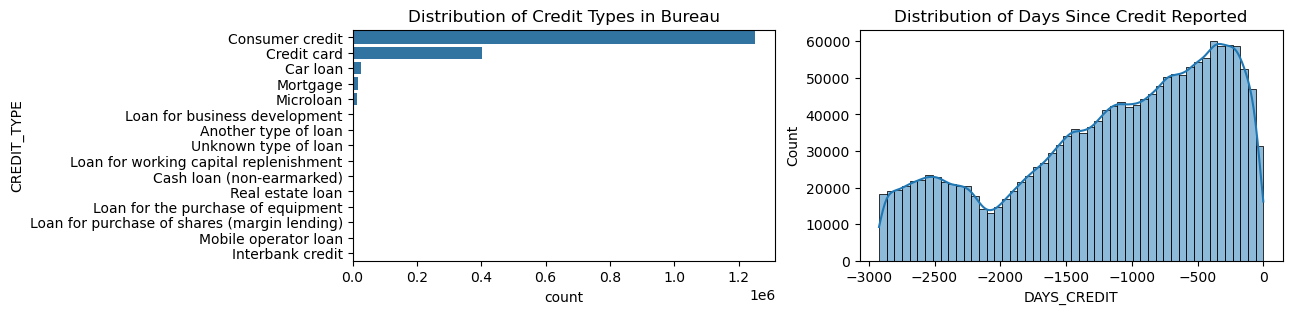

<Figure size 1000x600 with 0 Axes>

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

bureau = datasets["bureau"].copy()
bureau_balance = datasets["bureau_balance"].copy()
# Missing value summary
#print(bureau.isnull().sum().sort_values(ascending=False).head(10))
fig,axs = plt.subplots(1,2, figsize=(12,3))

# CREDIT_ACTIVE distribution
#sns.countplot(y='CREDIT_ACTIVE', data=bureau,ax=axs[0], order=bureau['CREDIT_ACTIVE'].value_counts().index)
#axs[0].set_title("Credit Activity Status in Bureau Records")
 

# CREDIT_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(y='CREDIT_TYPE', data=bureau,ax=axs[0] ,order=bureau['CREDIT_TYPE'].value_counts().index)
axs[0].set_title("Distribution of Credit Types in Bureau")
 

# Distribution of DAYS_CREDIT
sns.histplot(bureau['DAYS_CREDIT'], bins=50,ax=axs[1], kde=True)
axs[1].set_title("Distribution of Days Since Credit Reported")
axs[1].set_xlabel("DAYS_CREDIT")

plt.tight_layout()
plt.show()


Most clients in the dataset have closed loans reported to external credit bureaus, with a large portion also maintaining active debts. The dominant types of loans are consumer credit and credit cards, reflecting a retail-focused client base. 


The DAYS_CREDIT distribution shows that most credit records are recent, peaking near 0 days before the application. This indicates active credit behavior in the recent past. While some records go back over 8 years, the concentration near recent dates makes DAYS_CREDIT a strong indicator of current financial activity.

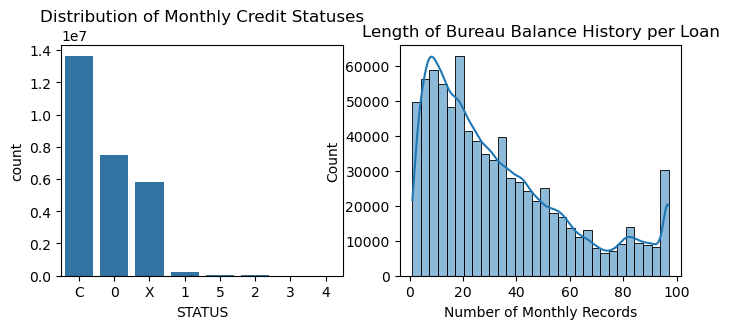

In [203]:
# STATUS distribution
fig, axs =plt.subplots(1,2, figsize=(8,3))
sns.countplot(x="STATUS", data=bureau_balance,ax=axs[0] ,order=bureau_balance["STATUS"].value_counts().index)
axs[0].set_title("Distribution of Monthly Credit Statuses")
 

# Number of months per loan
months = bureau_balance.groupby("SK_ID_BUREAU")["MONTHS_BALANCE"].count()
sns.histplot(months,ax=axs[1] ,bins=30, kde=True)
axs[1].set_title("Length of Bureau Balance History per Loan")
axs[1].set_xlabel("Number of Monthly Records")
plt.show()


Most of the loans are Closed in the Credit Bureau, which is followed by clients with 0 DPD and then by applicants whose status is unknown. We can conclude that there are very few annuity defaulters in the data.


Most loans have a bureau balance history of fewer than 30 months, with a steep drop-off after that. A secondary spike near 100 months suggests some long-term loans, possibly mortgages or credit cards with extended activity. 


## EDA on the ‘Previous Application’ Dataset

In [192]:
 prev = datasets["previous_application"]


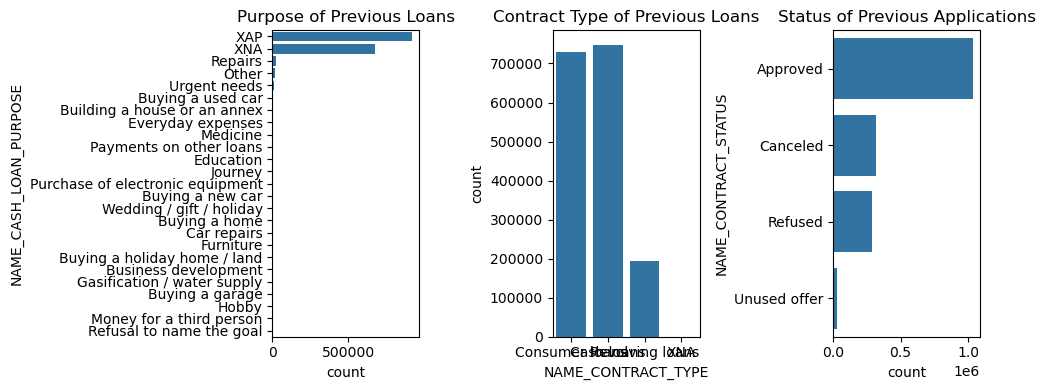

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
fig ,axs = plt.subplots(1,3, figsize=(10,4) )
 
sns.countplot(y="NAME_CASH_LOAN_PURPOSE", data=prev, ax=axs[0],order=prev["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
axs[0].set_title("Purpose of Previous Loans")

sns.countplot(x="NAME_CONTRACT_TYPE", ax=axs[1],data=prev)
axs[1].set_title("Contract Type of Previous Loans")
 
sns.countplot(y="NAME_CONTRACT_STATUS", data=prev,ax=axs[2], order=prev["NAME_CONTRACT_STATUS"].value_counts().index)
axs[2].set_title("Status of Previous Applications")
plt.tight_layout()
plt.show()


Most previous applications were approved, followed by canceled and refused ones. This suggests a generally strong approval history among clients.

Most previous loans were labeled with unknown or system-generated purposes (XAP, XNA), while consumer and cash loans dominated contract types. Revolving loans were less common.

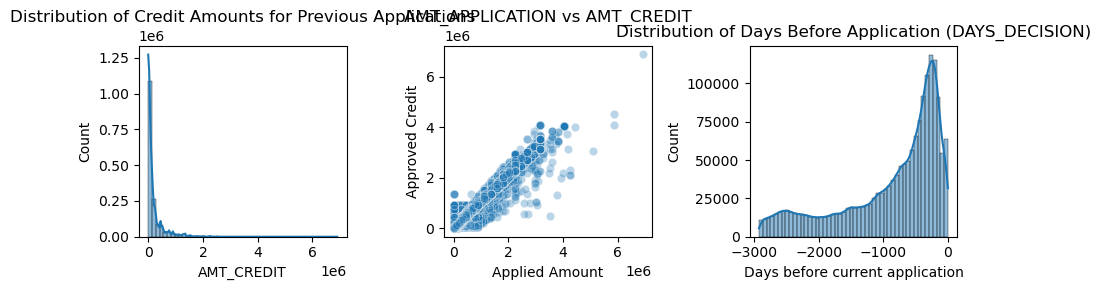

In [208]:
fig, axs = plt.subplots(1,3, figsize=(9,3))

sns.histplot(prev["AMT_CREDIT"].dropna(), ax= axs[0], bins=50, kde=True)
axs[0].set_title("Distribution of Credit Amounts for Previous Applications")
axs[0].set_xlabel("AMT_CREDIT")
 

# Application amount vs credit approved
sns.scatterplot(x="AMT_APPLICATION", y="AMT_CREDIT", ax=axs[1],data=prev, alpha=0.3)
axs[1].set_title("AMT_APPLICATION vs AMT_CREDIT")
axs[1].set_xlabel("Applied Amount")
axs[1].set_ylabel("Approved Credit")

sns.histplot(prev["DAYS_DECISION"].dropna(),ax=axs[2], bins=50, kde=True)
axs[2].set_title("Distribution of Days Before Application (DAYS_DECISION)")
axs[2].set_xlabel("Days before current application")

plt.tight_layout()
plt.show()
 

Most previous credit amounts were small, with a strong correlation between applied and approved amounts. A few high-value applications exist but are rare.

## EDA on the ‘POS Cash Balance’ Dataset

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pos_cash_balance =datasets["POS_CASH_balance"].copy()
 

The missing values in CNT_INSTALMENT_FUTURE and CNT_INSTALMENT are relatively small compared to the overall size

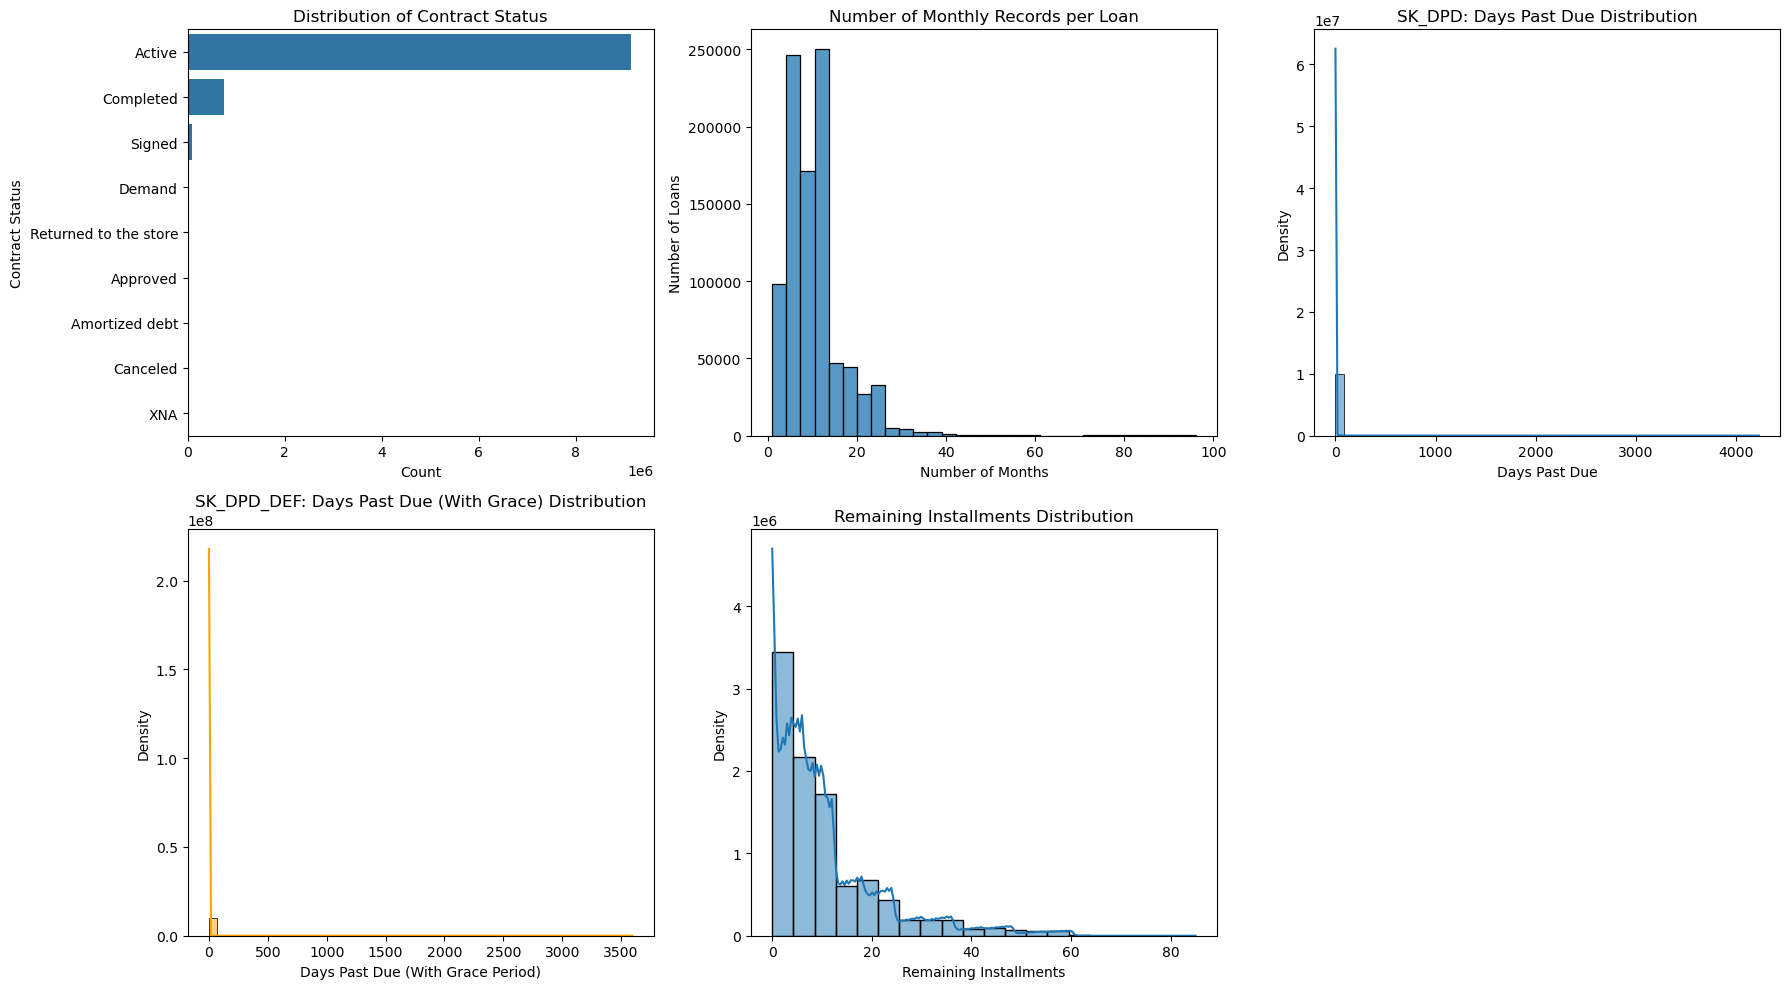

In [211]:
 
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

 
sns.countplot(
    y="NAME_CONTRACT_STATUS",
    data=pos_cash_balance,
    order=pos_cash_balance["NAME_CONTRACT_STATUS"].value_counts().index,
    ax=axs[0]
)
axs[0].set_title("Distribution of Contract Status")
axs[0].set_ylabel("Contract Status")
axs[0].set_xlabel("Count")

# 2. Number of Monthly Records per Loan
months = pos_cash_balance.groupby("SK_ID_PREV")["MONTHS_BALANCE"].count()
sns.histplot(months, bins=30, kde=False, ax=axs[1])
axs[1].set_title("Number of Monthly Records per Loan")
axs[1].set_xlabel("Number of Months")
axs[1].set_ylabel("Number of Loans")

# 3. SK_DPD Distribution
sns.histplot(pos_cash_balance["SK_DPD"], bins=50, kde=True, ax=axs[2])
axs[2].set_title("SK_DPD: Days Past Due Distribution")
axs[2].set_xlabel("Days Past Due")
axs[2].set_ylabel("Density")

# 4. SK_DPD_DEF Distribution
sns.histplot(pos_cash_balance["SK_DPD_DEF"], bins=50, kde=True, color="orange", ax=axs[3])
axs[3].set_title("SK_DPD_DEF: Days Past Due (With Grace) Distribution")
axs[3].set_xlabel("Days Past Due (With Grace Period)")
axs[3].set_ylabel("Density")

# 5. CNT_INSTALMENT_FUTURE Distribution
sns.histplot(pos_cash_balance["CNT_INSTALMENT_FUTURE"], bins=20, kde=True, ax=axs[4])
axs[4].set_title("Remaining Installments Distribution")
axs[4].set_xlabel("Remaining Installments")
axs[4].set_ylabel("Density")
 
axs[5].axis('off')  
 
plt.tight_layout()
plt.show()

Most POS contracts are still active, with a smaller portion marked as completed. Very few are labeled as canceled, returned, or in other statuses, indicating that most loans in this dataset are ongoing and can provide valuable behavioral signals.

Most POS loans have fewer than 20 monthly records.
they are relatively short-term. Only a small fraction span longer durations, suggesting limited long-term POS credit activity.

The vast majority of POS payments are made on time, with SK_DPD equal to zero

Most payments fall within the grace period, showing SK_DPD_DEF = 0. 
Most loans have fewer than 10 remaining installments, suggesting they are near completion. 

## EDA on installments_payments

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
installments_payments = datasets["installments_payments"].copy()

print("installments_payments shape:", installments_payments.shape)

installments_payments shape: (13605401, 8)


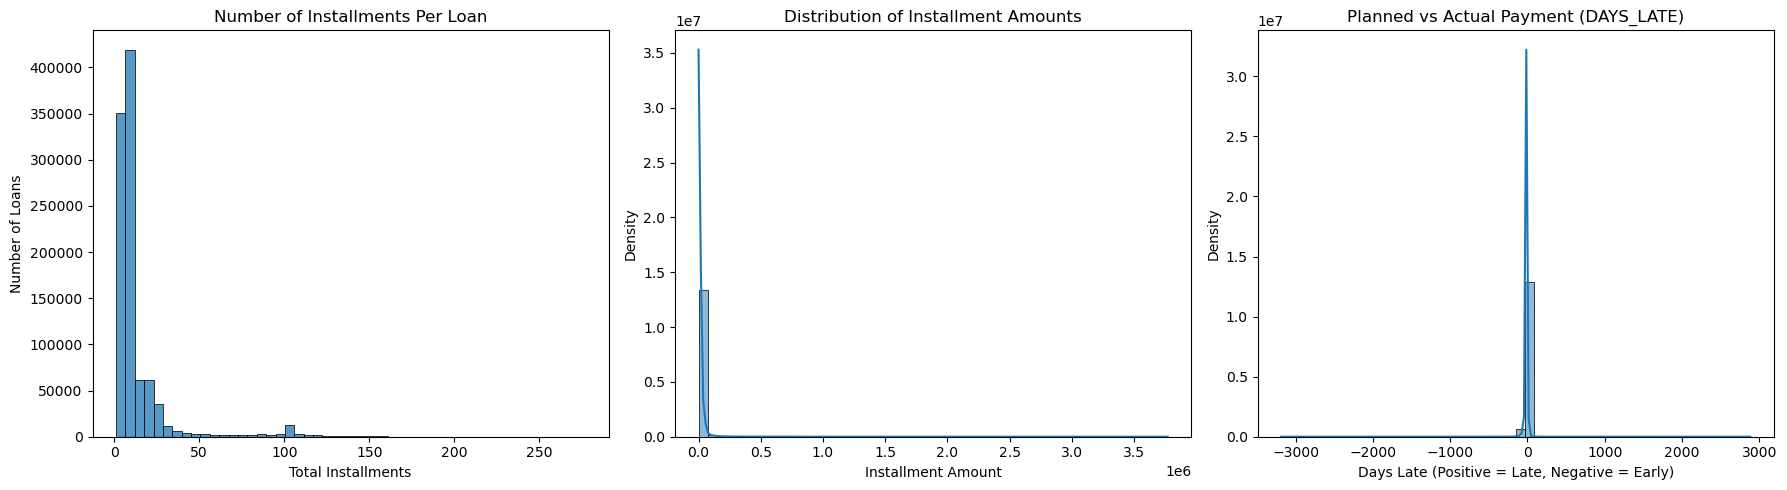

In [214]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
axs = axs.flatten()

# 1. Number of Installments per Loan
num_installments = installments_payments.groupby("SK_ID_PREV")["NUM_INSTALMENT_NUMBER"].max()
sns.histplot(num_installments, bins=50, kde=False, ax=axs[0])
axs[0].set_title("Number of Installments Per Loan")
axs[0].set_xlabel("Total Installments")
axs[0].set_ylabel("Number of Loans")

# 2. Distribution of Installment Amounts
sns.histplot(installments_payments["AMT_INSTALMENT"], bins=50, kde=True, ax=axs[1])
axs[1].set_title("Distribution of Installment Amounts")
axs[1].set_xlabel("Installment Amount")
axs[1].set_ylabel("Density")

# 3. DAYS_LATE: Difference Between Planned and Actual Payment Dates
installments_payments["DAYS_LATE"] = installments_payments["DAYS_ENTRY_PAYMENT"] - installments_payments["DAYS_INSTALMENT"]
sns.histplot(installments_payments["DAYS_LATE"], bins=50, kde=True, ax=axs[2])
axs[2].set_title("Planned vs Actual Payment (DAYS_LATE)")
axs[2].set_xlabel("Days Late (Positive = Late, Negative = Early)")
axs[2].set_ylabel("Density")

# Final layout
plt.tight_layout()
plt.show()


sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", data=installments_payments, alpha=0.3)
plt.title("Installment Amount vs Actual Payment")
plt.xlabel("Planned Installment Amount")
plt.ylabel("Actual Payment")
plt.show()

Most installment payments are relatively small, with a sharp drop-off as the amount increases. High-value installments are rare.

Most loans are repaid in fewer than 50 installments, suggesting they are short to medium term.

## Dataset questions
 

So every one applicant has one Unique Key.There is no overlap.

In [34]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

### previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [17]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


Here, we define new variable "appsDF" to store prevoius dataset.

Most clients have fewer than 10 previous applications, though a few have over 50, indicating repeated borrowing

this below block creates a visualization that shows which clients have an unusually high number of previous loan applications.

### Histogram of Number of previous applications for an ID

In [45]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

60458 applicants only applied once before.

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

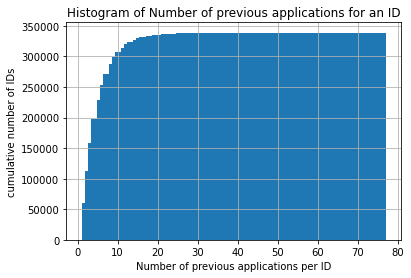

In [46]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

The majority of clients fall into the medium activity range (10–39 apps). Segmenting clients this way could be useful for modeling, as frequent re-applicants may carry different risk profiles than first-timers or rare users.

In [47]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Baseline Model & Feature Importance

ClassifierImbalancesWithPreprocessing defines a reusable pipeline wrapper for handling our whole dataset, it allows the use of numerical and categorical feature exclusively and inclusively. During training it it will balance the classes according to the 'min smapling' parameter, but during prediction the undersampling will not be performed. Categorical features are imputed with a constant and one-hot encoded meanwhile missing numerical features are imputed using the median and then standardized with the rest of the numerical features.

 Additionally we designed a function to quickly run our baseline model to quickly divide our dataset into train and test data and make our experiment log. We also made a function to visualize feature importance as given by a Random Forest and Logistic Regression importance
The highest macro F1 , which treats each class equally regardless of sample size, we obtained using all features from the only preprocessed training dataset was 0.60 reached by Random Forest, Gradient Boosting, and AdaBoost the 3 models which also corresponded to the highest micro F1 scores, which accounts for class imbalance,their scores ranged from 0.84 to 0.86. The highest AUC score was obtained by GradientBoosting Classifier.

With 121 features the models take quite a while to train with GradientBoostingClassifier taking the longest, however this is also the model with the best performance. The aforementioned tree based models all take the longest with Gaussian and  DecisionTree Classifier taking the least but also showing a significant drop in performance. 

The features identified as most important linearly—based on the coefficients of the baseline logistic regression model—and those most important in the non-linear Random Forest model differ significantly in order however the top 35 feature for each overlap a lot.

When training the model with the top features given by logistic regression and random forest we only see significant changes in performance in the case Naive Bayes, in the rest we see a slight decrease in performance but is worth examining better methods for feature selection.

In [363]:
class ClassifierImbalancesWithPreprocessing:
    def __init__(self, num_features, cat_features,minority_sampling, model=None):
        self.num_features = num_features
        self.cat_features = cat_features
        self.model = model  
        self.pipeline = None
        self.min_sampling= minority_sampling

    def build_pipeline(self, include_numerical=True, include_categorical=False):
 
        if include_numerical:
            num_pipeline = Pipeline([
          #     ('imbalances', HighImbalanceTransformer(threshold=0.6)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
            ])
        else:
            num_pipeline = 'drop'

        if include_categorical:
            cat_pipeline = Pipeline([
             #   ('imbalances', HighImbalanceTransformer(threshold=0.6)),
                ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
                ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                      drop='first',
                                      sparse=False)),          
            ])
        else:
            cat_pipeline = 'drop'

        
        self.preprocessor = ColumnTransformer(transformers=[            
                ('num', num_pipeline, self.num_features),
                ('cat', cat_pipeline, self.cat_features),
        ])    
          
        clf = clone(self.model)
        self.pipeline = ImbPipeline(steps=[  # Used to be Pipeline
            ('preprocessing', self.preprocessor),
            ('undersample', RandomUnderSampler(sampling_strategy=self.min_sampling)), # delete if worse?
            ('clf', clf)
        ])
        
    def fit(self, X, y, include_numerical=True, include_categorical=False):
        self.build_pipeline(include_numerical=include_numerical, include_categorical=include_categorical)       
        self.pipeline.fit(X, y.values.ravel())
        return self
     
    def predict(self, X):
        return self.pipeline.predict(X)

    def score(self, X, y):
        return self.pipeline.score(X, y)

    def get_pipeline(self):
        return self.pipeline
    def get_params(self, deep=True):
        return {
            'num_features': self.num_features,
            'cat_features': self.cat_features,
            'minority_sampling': self.min_sampling,
            'model': self.model
        }
    def set_params(self, **params):
        for param, val in params.items():
            setattr(self, param, val)
        return self
    def predict_proba(self, X):
        if hasattr(self.pipeline, "predict_proba"):
            return self.pipeline.predict_proba(X)
        else:
       
            raise AttributeError(f"{self.model.__class__.__name__} does not support predict_proba().")

    def make_classification_reports(self, X_train, X_test , y_train, y_test , print_reports= True):
        
        y_train_pred = self.pipeline.predict(X_train)
   
        report = classification_report(y_train, y_train_pred,output_dict=True) 
        precision_0_train = report['0']['precision']
        recall_0_train = report['0']['recall']
        f1_0_train = report['0']['f1-score']
     
        precision_1_train = report['1']['precision']
        recall_1_train = report['1']['recall']
        f1_1_train = report['1']['f1-score']
        if print_reports: 
            print("\n\n\n")
            print("_" * 55)
            print(f"{self.model} TRAIN".center(55))
            print("_" * 55)
            print(classification_report(y_train, y_train_pred,output_dict=False) )
            print("\n\n\n")
      
        y_pred = self.pipeline.predict(X_test)
        report = classification_report(y_test, y_pred ,output_dict=True)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        precision_0_test = report['0']['precision']
        recall_0_test = report['0']['recall']
        f1_0_test = report['0']['f1-score']

        precision_1_test = report['1']['precision']
        recall_1_test = report['1']['recall']
        f1_1_test = report['1']['f1-score']

        
        if print_reports: 
            print("_" * 55)
            print(f"{self.model} TEST WITH WHOLE DATASET".center(55))
            print("_" * 55)
            print(classification_report(y_test, y_pred ,output_dict=False))
     
        return  [f1_macro, f1_micro,f1_0_train,f1_1_train,f1_0_test, f1_1_test, precision_0_train,precision_1_train , 
                 precision_0_test, precision_1_test,  recall_0_train,  recall_1_train,recall_0_test, recall_1_test ]

In [364]:
def get_og_features(base_features, transformed_columns):
    surviving = [base for base in base_features if any(base in col for col in transformed_columns)]
    return surviving

def get_name_columns(clf):
    pipe = clf.pipeline
    pre   = clf.get_pipeline().named_steps['preprocessing']
    num_names = clf.num_features
    cat_pipe = pre.named_transformers_['cat']
    ohe = cat_pipe.named_steps['onehot'] 
    cat_names = ohe.get_feature_names_out(clf.cat_features)
    all_names = list(num_names) + list(cat_names)
    return pipe, pre ,all_names
    
def f_importance_rf_lr(X, y, minority_sampling, top_n=20):
    X_train, X_test , y_train, y_test  = train_test_split( X, y, test_size=0.2, random_state=42)
  
    num_feats = X.select_dtypes(include=np.number).columns.tolist()
    cat_feats = X.select_dtypes(exclude=np.number).columns.tolist()
 
    lr = LogisticRegression(max_iter=1000)
    clf_lr = ClassifierImbalancesWithPreprocessing(num_feats, cat_feats, minority_sampling, model=lr)
    clf_lr.fit(X_train, y_train, include_numerical=True, include_categorical=True)

    pipe_lr, _, feature_names_lr = get_name_columns(clf_lr)
    coefficients = pipe_lr.named_steps['clf'].coef_[0]

    imp_df_lr = pd.DataFrame({
        'feature': feature_names_lr,
        'LR_importance': np.abs(coefficients)
    })
    imp_df_lr["LR_rank"] = imp_df_lr["LR_importance"].rank(ascending=False, method='min')

 
    rf = RandomForestClassifier()
    clf_rf = ClassifierImbalancesWithPreprocessing(num_feats, cat_feats, minority_sampling, model=rf)
    clf_rf.fit(X_train, y_train, include_numerical=True, include_categorical=True)

    pipe_rf, _, feature_names_rf = get_name_columns(clf_rf)
    importances = pipe_rf.named_steps['clf'].feature_importances_

    imp_df_rf = pd.DataFrame({
        'feature': feature_names_rf,
        'RF_importance': np.abs(importances)
    })
    imp_df_rf["RF_rank"] = imp_df_rf["RF_importance"].rank(ascending=False, method='min')

 
    feature_importance_df = pd.merge(imp_df_lr, imp_df_rf, on="feature", how="outer").fillna(0)
    feature_importance_df["avg_rank"] = feature_importance_df[["LR_rank", "RF_rank"]].mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values("avg_rank")
 
    return feature_importance_df.head(top_n).reset_index(drop=True)

In [365]:
def run_baseline_pipeline(X, y, models, baseLog=None,numerical_features=None, categorical_features=None,minority_sampling=0.5, **kwargs):
    dtyped_used = []
    if baseLog is None:

        columns = ['Model', 'Time', 'Feautures'] + [ "AUC",'f1_macro','f1_micro','f1_0_train', 'f1_1_train', 'f1_0_test', 'f1_1_test',
                                'precision_0_train','precision_1_train','precision_0_test','precision_1_test',
                                'recall_0_train','recall_1_train','recall_0_test','recall_1_test', 'Sampling',"#features"]
        baseLog = pd.DataFrame(columns=columns)

    if not 'numerical_features':
        include_numerical=False
    else:
        include_numerical=True

    if not 'categorical_features':
        include_categorical = False
    else:
        include_categorical = True

    if include_numerical:
        dtyped_used.append('Num ')
    if include_categorical:
        dtyped_used.append('Cat ')
    dtyped_used = ' '.join(dtyped_used)

    X_train, X_test , y_train, y_test  = train_test_split( X, y, test_size=0.2, random_state=42)
    for model in models:  
        clf = ClassifierImbalancesWithPreprocessing(
            numerical_features, 
            categorical_features,
            minority_sampling, 
            model = model)
        start = time.time()
        clf.fit(X_train, y_train, include_numerical=include_numerical, include_categorical = include_categorical)
        end = time.time()
        ttime = end - start
        print(model)
        print("Train score:", clf.score(X_train, y_train))
        print("Test  score:", clf.score(X_test,  y_test))
        y_probs = clf.predict_proba(X_test)[:, 1]  
        roc_auc = roc_auc_score(y_test, y_probs)
        print("AUC score: ",roc_auc)
        c_report= clf.make_classification_reports( X_train, X_test , y_train, y_test,  print_reports=False)
     
        lst = [model.__class__.__name__ ,ttime,dtyped_used, roc_auc]+c_report+ [minority_sampling] +[len(X_train.columns)]
        baseLog.loc[len(baseLog)] = lst
        print('-'*50)
    return baseLog

## Running baseline model

In [379]:
y = datasets["application_train"]["TARGET"].copy()
X = datasets["application_train"].drop(columns=["TARGET"])
print(f"Missing y /  TARGET values: {y.isna().sum()}")
num_feats = X.select_dtypes(include=np.number).columns.tolist()
cat_feats = datasets["application_train"].select_dtypes(exclude=np.number).columns
cat_feats = [col for col in cat_feats if col in X.columns]


Missing y /  TARGET values: 0


In [217]:
models = [GaussianNB(), DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
baseLogBasic = run_baseline_pipeline(X, y, 
                                    models,
                                    numerical_features=num_feats, 
                                    categorical_features=cat_feats,
                                    minority_sampling=0.5)
baseLogBasic

GaussianNB()
Train score: 0.17692514064583265
Test  score: 0.17696697722062338
AUC score:  0.5688976511865665
--------------------------------------------------
DecisionTreeClassifier()
Train score: 0.7797591948229325
Test  score: 0.6867957660601922
AUC score:  0.579860460275101
--------------------------------------------------
RandomForestClassifier()
Train score: 0.9402743000227635
Test  score: 0.8720712810757199
AUC score:  0.7348860381049915
--------------------------------------------------
GradientBoostingClassifier()
Train score: 0.8550412994699359
Test  score: 0.8517633286181162
AUC score:  0.7522332273398447
--------------------------------------------------
AdaBoostClassifier()
Train score: 0.8429522617150662
Test  score: 0.8419751882022015
AUC score:  0.7429471720935727
--------------------------------------------------


Model       Time  Feautures       AUC  f1_macro  \
0                  GaussianNB   2.702229  Num  Cat   0.568898  0.176393   
1      DecisionTreeClassifier   5.139712  Num  Cat   0.579860  0.497281   
2      RandomForestClassifier  14.806168  Num  Cat   0.734886  0.604580   
3  GradientBoostingClassifier  49.541386  Num  Cat   0.752233  0.605362   
4          AdaBoostClassifier  12.531711  Num  Cat   0.742947  0.601673   

   f1_micro  f1_0_train  f1_1_train  f1_0_test  f1_1_test  precision_0_train  \
0  0.176967    0.197423    0.155353   0.198140   0.154645           0.952024   
1  0.686796    0.863895    0.423195   0.805944   0.188619           1.000000   
2  0.872071    0.966421    0.730131   0.929805   0.279355           1.000000   
3  0.851763    0.919064    0.306355   0.917194   0.293530           0.944044   
4  0.841975    0.911678    0.292179   0.911058   0.292289           0.943673   

   precision_1_train  precision_0_test  precision_1_test  recall_0_train  \
0           0.084699          0.951468          0.084289        0.110130   
1           0.268388          0.936550          0.119146        0.760401   
2           0.574966          0.938344          0.255487        0.935025   
3           0.249723          0.942947          0.238059        0.895371   
4           0.229752          0.944195          0.228484        0.881781   

   recall_1_train  recall_0_test  recall_1_test  Sampling  #features  
0        0.936859       0.110585       0.935543       0.5        122  
1        1.000000       0.707306       0.452415       0.5        122  
2        1.000000       0.921420       0.308143       0.5        122  
3        0.396206       0.892810       0.382704       0.5        122  
4        0.401187       0.880168       0.405536       0.5        122

### Calculating Feature 'Importance' through Logistic Regression and Random Forest

In [380]:
importance_df_ = f_importance_rf_lr(X, y, 0.5, top_n=20) 
importance_df_

feature  LR_importance  LR_rank  \
0                                       DAYS_EMPLOYED       3.484299      1.0   
1                                          AMT_CREDIT       0.913159      7.0   
2                                     AMT_GOODS_PRICE       0.997054      6.0   
3                                        EXT_SOURCE_3       0.465402     24.0   
4                                        EXT_SOURCE_2       0.385228     30.0   
5                                     COMMONAREA_MEDI       0.886254      8.0   
6                                      LIVINGAREA_AVG       0.363400     32.0   
7                                     LIVINGAREA_MEDI       0.351906     34.0   
8                                      COMMONAREA_AVG       0.602994     17.0   
9                                    BASEMENTAREA_AVG       0.442897     27.0   
10                           NAME_INCOME_TYPE_Working       0.643703     12.0   
11                                  BASEMENTAREA_MEDI       0.335965     39.0   
12                              LIVINGAPARTMENTS_MEDI       0.589270     20.0   
13                                      CODE_GENDER_M       0.335566     40.0   
14                           OBS_30_CNT_SOCIAL_CIRCLE       0.242020     64.0   
15                           OBS_60_CNT_SOCIAL_CIRCLE       0.238937     67.0   
16  NAME_EDUCATION_TYPE_Secondary / secondary special       0.487085     23.0   
17                               LIVINGAPARTMENTS_AVG       0.325321     42.0   
18                                       EXT_SOURCE_1       0.171684     91.0   
19                                    COMMONAREA_MODE       0.262294     57.0   

    RF_importance  RF_rank  avg_rank  
0        0.028288      7.0       4.0  
1        0.026867     10.0       8.5  
2        0.025086     12.0       9.0  
3        0.063428      1.0      12.5  
4        0.061616      2.0      16.0  
5        0.005411     42.0      25.0  
6        0.008334     24.0      28.0  
7        0.008293     25.0      29.5  
8        0.005328     44.0      30.5  
9        0.006658     35.0      31.0  
10       0.004478     59.0      35.5  
11       0.006429     36.0      37.5  
12       0.004634     57.0      38.5  
13       0.006184     38.0      39.0  
14       0.011202     19.0      41.5  
15       0.011077     20.0      43.5  
16       0.003901     67.0      45.0  
17       0.004716     54.0      48.0  
18       0.026789     11.0      51.0  
19       0.005257     45.0      51.0

In [ ]:
importance_df_ = f_importance_rf_lr(X, y, 0.5, top_n=20) 

### Training with top features given by Logistic Regression Coefficients

In [366]:
features = importance_df_.sort_values(by="LR_importance", ascending= False)["feature"].values.tolist()[:30]
features = get_og_features(X.columns, features)
print(features)
y = datasets["application_train"]["TARGET"].copy()
X = datasets["application_train"].drop(columns=["TARGET"])
X = X[features]
print(f"Missing y /  TARGET values: {y.isna().sum()}")
num_feats = X.select_dtypes(include=np.number).columns.tolist()
cat_feats = datasets["application_train"].select_dtypes(exclude=np.number).columns
cat_feats = [col for col in cat_feats if col in X.columns]
models = [GaussianNB(), DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
baseLogBasic = run_baseline_pipeline(X, y, 
                                    models,
                                    numerical_features=num_feats, 
                                    categorical_features=cat_feats,
                                    minority_sampling=0.5,)
                           
baseLogBasic

['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT']
Missing y /  TARGET values: 0
GaussianNB()
Train score: 0.782998926864167
Test  score: 0.7811326276766987
AUC score:  0.6999255510496771
--------------------------------------------------
DecisionTreeClassifier()
Train score: 0.7792714058079412
Test  score: 0.6856901289367998
AUC score:  0.5816561894509626
--------------------------------------------------
RandomForestClassifier()
Train score: 0.8927839745048941
Test  score: 0.8207729704242069
AUC score:  0.7074556790755611
--------------------------------------------------
GradientBoostingClassifier()
Train score: 0.8478748658580209
Test  score: 0.8468204803017739
AUC score:  0.7393543899874058
--------------------------------------------------
AdaBoostClassifier()
Train score: 0.8489317420571689
Test  score: 0.8482350454449377
AUC score:  0.7319823925581405
--------------------------------------------------


Model      Time  Feautures       AUC  f1_macro  \
0                  GaussianNB  0.154943  Num  Cat   0.699926  0.563852   
1      DecisionTreeClassifier  0.459213  Num  Cat   0.581656  0.497436   
2      RandomForestClassifier  7.284080  Num  Cat   0.707456  0.580887   
3  GradientBoostingClassifier  5.803975  Num  Cat   0.739354  0.601652   
4          AdaBoostClassifier  1.439766  Num  Cat   0.731982  0.598847   

   f1_micro  f1_0_train  f1_1_train  f1_0_test  f1_1_test  precision_0_train  \
0  0.781133    0.872812    0.261550   0.871694   0.256011           0.946165   
1  0.685690    0.863553    0.422655   0.805023   0.189850           1.000000   
2  0.820773    0.938068    0.601137   0.897966   0.263808           1.000000   
3  0.846820    0.914799    0.290809   0.914162   0.289142           0.942740   
4  0.848235    0.915576    0.282659   0.915142   0.282552           0.941357   

   precision_1_train  precision_0_test  precision_1_test  recall_0_train  \
0           0.180365          0.945553          0.176202        0.810014   
1           0.267954          0.936982          0.119765        0.759870   
2           0.429733          0.942229          0.197027        0.883360   
3           0.233264          0.942988          0.230732        0.888468   
4           0.229300          0.941787          0.228011        0.891170   

   recall_1_train  recall_0_test  recall_1_test  Sampling  #features  
0        0.475649       0.808537       0.467973       0.5          6  
1        1.000000       0.705644       0.457668       0.5          6  
2        1.000000       0.857676       0.399071       0.5          6  
3        0.386043       0.887046       0.387149       0.5          6  
4        0.368384       0.889964       0.371388       0.5          6

### Training with top features given by Random Forest

In [246]:
features = importance_df_.sort_values(by="RF_importance")["feature"].values.tolist()[:35]
features = get_og_features(X.columns, features)
y = datasets["application_train"]["TARGET"].copy()
X = datasets["application_train"].drop(columns=["TARGET"])
X = X[features]
print(features)
print(f"Missing y /  TARGET values: {y.isna().sum()}")
num_feats = X.select_dtypes(include=np.number).columns.tolist()
cat_feats = datasets["application_train"].select_dtypes(exclude=np.number).columns
cat_feats = [col for col in cat_feats if col in X.columns]
models = [GaussianNB(), DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
baseLogBasic = run_baseline_pipeline(X, y, 
                                    models,
                                    numerical_features=num_feats, 
                                    categorical_features=cat_feats,
                                    minority_sampling=0.5, baseLog = baseLogBasic)
baseLogBasic

['CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'COMMONAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']
Missing y /  TARGET values: 0
GaussianNB()
Train score: 0.16198660206172158
Test  score: 0.1620083573159033
AUC score:  0.6759264046265507
--------------------------------------------------
DecisionTreeClassifier()
Train score: 0.7768731098175669
Test  score: 0.6831374079313204
AUC score:  0.5716945210207312
--------------------------------------------------
RandomForestClassifier()
Train score: 0.9090964521478976
Test  score: 0.8381379770092516
AUC score:  0.7197866017799992
--------------------------------------------------
GradientBoostingClassifier()
Train score: 0.8527283665571851
Test 

Model       Time  Feautures       AUC  f1_macro  \
0                  GaussianNB   0.512711  Num  Cat   0.675080  0.161314   
1      DecisionTreeClassifier   1.148204  Num  Cat   0.570967  0.491301   
2      RandomForestClassifier   8.639058  Num  Cat   0.720171  0.588003   
3  GradientBoostingClassifier  11.169519  Num  Cat   0.744440  0.603833   
4          AdaBoostClassifier   2.763197  Num  Cat   0.738413  0.600073   
5                  GaussianNB   0.507875  Num  Cat   0.675926  0.161943   
6      DecisionTreeClassifier   1.149657  Num  Cat   0.571695  0.492886   
7      RandomForestClassifier   8.682998  Num  Cat   0.719787  0.589542   
8  GradientBoostingClassifier  11.066149  Num  Cat   0.744909  0.602172   
9          AdaBoostClassifier   2.729105  Num  Cat   0.738284  0.600003   

   f1_micro  f1_0_train  f1_1_train  f1_0_test  f1_1_test  precision_0_train  \
0  0.161374    0.169305    0.154505   0.168419   0.154209           0.952876   
1  0.679934    0.862046    0.420300   0.801071   0.181531           1.000000   
2  0.837260    0.947666    0.638625   0.908461   0.267545           0.999990   
3  0.850284    0.916981    0.297473   0.916300   0.291365           0.943231   
4  0.848658    0.915037    0.287377   0.915376   0.284770           0.942170   
5  0.162008    0.169361    0.154480   0.169329   0.154558           0.952720   
6  0.683137    0.861865    0.420020   0.803497   0.182276           1.000000   
7  0.838138    0.947981    0.639963   0.908976   0.270108           0.999995   
8  0.850739    0.917732    0.298195   0.916635   0.287709           0.943158   
9  0.845666    0.913738    0.286387   0.913475   0.286530           0.942309   

   precision_1_train  precision_0_test  precision_1_test  recall_0_train  \
0           0.084109          0.954845          0.083915        0.092906   
1           0.266063          0.934766          0.114281        0.757540   
2           0.469125          0.940876          0.209729        0.900545   
3           0.240770          0.942834          0.235301        0.892151   
4           0.231467          0.942064          0.229758        0.889423   
5           0.084095          0.956656          0.084107        0.092941   
6           0.265839          0.934843          0.115024        0.757261   
7           0.470559          0.941170          0.211968        0.901111   
8           0.242440          0.942219          0.233531        0.893642   
9           0.228959          0.942745          0.228127        0.886849   

   recall_1_train  recall_0_test  recall_1_test  Sampling  #features  
0        0.947726       0.092354       0.950091       0.5         21  
1        1.000000       0.700835       0.441099       0.5         21  
2        0.999899       0.878205       0.369368       0.5         21  
3        0.389112       0.891219       0.382502       0.5         21  
4        0.378899       0.890158       0.374419       0.5         21  
5        0.947525       0.092885       0.951909       0.5         21  
6        1.000000       0.704513       0.438877       0.5         21  
7        0.999950       0.878912       0.372196       0.5         21  
8        0.387251       0.892404       0.374621       0.5         21  
9        0.382270       0.885967       0.385128       0.5         21

# Feature Engineering

To obtain relevant metrics we converted features into ratios, our eda showed that raw values overlapped heavily when it came to our target. So we had to emphasize proportional differences when agreggating new features. 

Within the aplication dataset we first flagged where an applicant requested more credit than thet earned in INCOME_GT_CREDIT_FLAG, which was relevant to since it brought into question how they would repay the loan. Then we normalised credit and annuiity amounta by income, obtaining CREDIT_INCOME_PERCENT & ANNUITY_INCOME_PERCENT. Measures which highlighted debt which might impede the applicant from repaying their loan.  CREDIT_TERM was obtained by dividing credit by monthly annuity while DAYS_EMPLOYED_PERCENT was relevant because the more time someone holds a job the more likely they are to have a stable income source to allow them to pay their loan. For categorical variables most where converted into continuous scores based on how likely it was for applicants to default given their value. This has the added beneefit of making the feature interpretable. 

Using the monthly credit card state,ents we calculated the RFM metrics, often used in marketing to cluster customers which is why kekept it as both a numerical and categorical feature, we also did the binning based on quantiles, to better differentiate the groups. 
From the loan records we got the total number of loans recorded and the types, and gauged their quality though aggergated features such as comparing total debt with total credit granted and seeing the overdue debt compared to the toal debt. We also got the average time a month was likely to be past due and the fraction of time of the applicant spent with loans.
From the previous application dataset we obtained how many times they had applied before, the applications were grouped by the applicant's unique id and the numerical values were averaged while the categorical values were one hot encodded and converted into a probability of obtaining a defaulted applicant solely from that feature., the same was done for the POS_cash installments and the rest of the credit card features.

## Data Lineage

INCOME_GT_CREDIT_FLAG      – income > credit (flag)
CREDIT_INCOME_PERCENT      – credit ÷ income
ANNUITY_INCOME_PERCENT     – annuity ÷ income
CREDIT_TERM                – credit ÷ annuity
DAYS_EMPLOYED_PERCENT      – employed days ÷ age days

Recency                    – months since last CC activity
Frequency                  – count of CC statements
Monetary                   – total CC balance
R_score                    – binned Recency (1–5)
F_score                    – binned Frequency (1–5)
M_score                    – binned Monetary (1–5)
RFM_Sum                    – R+F+M numeric
RFM_Score                  – RFM string label

BUREAU_LOAN_COUNT          – # bureau loans
BUREAU_LOAN_TYPES          – unique loan types
DEBT_CREDIT_RATIO          – debt ÷ total credit
OVERDUE_DEBT_RATIO         – overdue ÷ debt
AVG_MONTHS_PAST_DUE        – mean months past due
TOTAL_MONTHS               – bureau months tracked
MONTHS_WITH_LOAN           – months with active loan
MONTHS_NO_LOAN             – months without loan
FRAC_WITH_LOAN             – with‑loan months ÷ total

PREV_APP_COUNT             – # previous applications
PREV_* (num)               – mean previous numeric fields
PREV_* (cat)               – averaged previous dummies

POS_* (num)                – mean POS/CASH numeric
POS_* (cat)                – averaged POS dummies
INSTA_* (num)              – mean instalment numeric
CREDIT_* (num)             – mean CC numeric
CREDIT_* (cat)             – averaged CC dummies

Target‑encoded categories   – default‑rate probabilities


In [219]:
def discretize(series):
    return KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile") \
           .fit_transform(series.values.reshape(-1, 1)).astype(int).ravel() + 1
    
class GetAllFeatureTransformations:
    def __init__(self, bureau_=None, 
                 bureau_balance_=None,
                 application_ = None, 
                 previous_application_ = None, 
                 POS_CASH_balance_= None, 
                 installments_payments_ = None, 
                 credit_card_balance_ = None):
        self.bureau = bureau_.copy()
        self.bureau_balance = bureau_balance_.copy()
        self.application =application_.copy()
        self.previous_application =previous_application_.copy()
        self.POS_CASH_balance = POS_CASH_balance_.copy()
        self.installments_payments = installments_payments_.copy()
        self.credit_card_balance = credit_card_balance_.copy()
    
    def main(self):
        #main_application = self.getprobabilities_application()
        rfm_db = self.get_RFM_credit_card()   

        X = self.build_feature_matrix(self.application.copy(),
                            self.bureau.copy(),      
                            self.bureau_balance.copy(),
                            self.previous_application.copy(),
                            self.POS_CASH_balance.copy(),
                            self.installments_payments.copy(),
                            self.credit_card_balance.copy())
        df = df.loc[:, ~df.T.duplicated()]
        display(X)
        return X
    def getprobabilities_application():
        X = self.application.copy() 
        if 'OCCUPATION_TYPE' in X.columns:
            probabilities_OCCUPATION_TYPE = X.groupby('OCCUPATION_TYPE')['TARGET'].mean().to_dict()
            X["OCCUPATION_TYPE"] = X["OCCUPATION_TYPE"].map(probabilities_OCCUPATION_TYPE)
    
        if 'CNT_FAM_MEMBERS' in X.columns:
            probabilities_CNT_FAM_MEMBERS = X.groupby('CNT_FAM_MEMBERS')['TARGET'].mean().to_dict()
            X["CNT_FAM_MEMBERS"] = X["CNT_FAM_MEMBERS"].map(probabilities_CNT_FAM_MEMBERS)
    
        if 'NAME_EDUCATION_TYPE' in X.columns:
            probabilities_NAME_EDUCATION_TYPE = X.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().to_dict()
            X["NAME_EDUCATION_TYPE"] = X["NAME_EDUCATION_TYPE"].map(probabilities_NAME_EDUCATION_TYPE)
     
        if 'CNT_CHILDREN' in X.columns:
            probabilities_CNT_CHILDREN = X.groupby('CNT_CHILDREN')['TARGET'].mean().to_dict()
            X["CNT_CHILDREN"] = X["CNT_CHILDREN"].map(probabilities_CNT_CHILDREN)
    
        if 'FLAG_EMP_PHONE' in X.columns:
            probabilities_FLAG_EMP_PHONE = X.groupby('FLAG_EMP_PHONE')['TARGET'].mean().to_dict()
            X["FLAG_EMP_PHONE"] = X["FLAG_EMP_PHONE"].map(probabilities_FLAG_EMP_PHONE)
    
        if 'WALLSMATERIAL_MODE' in X.columns:
            probabilities_WALLSMATERIAL_MODE = X.groupby('WALLSMATERIAL_MODE')['TARGET'].mean().to_dict()
            X["WALLSMATERIAL_MODE"] = X["WALLSMATERIAL_MODE"].map(probabilities_WALLSMATERIAL_MODE)
    
        if 'ORGANIZATION_TYPE' in X.columns:
            probabilities_ORGANIZATION_TYPE = X.groupby('ORGANIZATION_TYPE')['TARGET'].mean().to_dict()
            X["ORGANIZATION_TYPE"] = X["ORGANIZATION_TYPE"].map(probabilities_ORGANIZATION_TYPE)
        return X
    
    def get_RFM_credit_card(self):
        credit_card_balance = self.credit_card_balance.copy()
        rfm_df = credit_card_balance.groupby("SK_ID_CURR").agg(
            Recency=("MONTHS_BALANCE", lambda x: abs(x.max())),
            Frequency=("MONTHS_BALANCE", "count"),
            Monetary=("AMT_BALANCE", "sum")
        ).reset_index()
    
        rfm_df["R_score"] = discretize(rfm_df["Recency"])
        rfm_df["F_score"] = discretize(rfm_df["Frequency"])
        rfm_df["M_score"] = discretize(rfm_df["Monetary"])
        rfm_df["RFM_Sum"] = rfm_df["R_score"] + rfm_df["F_score"] + rfm_df["M_score"]
        rfm_df["RFM_Score"] = (
            rfm_df["R_score"].astype(str) +
            rfm_df["F_score"].astype(str) +
            rfm_df["M_score"].astype(str)
        )
        return rfm_df

     
    def _safe_div(self,num, den):
        return np.where(den == 0, 0, num / den)
    
    def _num_mean(self,df, key, drop_cols=(), prefix=""):
        cols = [col for col in df.columns if col not in list(drop_cols) + [key]]

        numeric_cols = df[cols].select_dtypes(include="number").columns.tolist()
        
        if not numeric_cols:
            return pd.DataFrame({key: df[key].unique()})
    
        out = (
            df[[key] + numeric_cols]
            .groupby(key, as_index=False)
            .mean()
            .add_prefix(prefix)
        )   
        return out.rename(columns={f"{prefix}{key}": key}) 
        
            
    def _cat_mean(self, df, key, prefix=""):
        cats = df.select_dtypes("object")
        if cats.empty:
            return pd.DataFrame({key: df[key].unique()})
        dmy      = pd.get_dummies(cats, prefix=prefix, dummy_na=False)
        dmy[key] = df[key]
        return dmy.groupby(key, as_index=False).mean()
   
    def _add_app_ratios(self, app):
        app = app.copy()
        app["INCOME_GT_CREDIT_FLAG"]  = app["AMT_INCOME_TOTAL"] > app["AMT_CREDIT"]
        app["CREDIT_INCOME_PERCENT"]  = self._safe_div(app["AMT_CREDIT"],  app["AMT_INCOME_TOTAL"])
        app["ANNUITY_INCOME_PERCENT"] = self._safe_div(app["AMT_ANNUITY"], app["AMT_INCOME_TOTAL"])
        app["CREDIT_TERM"]            = self._safe_div(app["AMT_CREDIT"],  app["AMT_ANNUITY"])
        app["DAYS_EMPLOYED_PERCENT"]  = self._safe_div(app["DAYS_EMPLOYED"], app["DAYS_BIRTH"])
        return app
  
    def _bureau_features(self, bureau, bureau_balance, key="SK_ID_CURR"):
        loan_cnt   = bureau.groupby(key).size().astype("int32").rename("BUREAU_LOAN_COUNT")
        loan_types = bureau.groupby(key)["CREDIT_TYPE"].nunique().astype("int16").rename("BUREAU_LOAN_TYPES")
    
        debt = (bureau.groupby(key)
                      .agg(TOTAL_CREDIT_SUM      = ("AMT_CREDIT_SUM",       "sum"),
                           TOTAL_CREDIT_SUM_DEBT = ("AMT_CREDIT_SUM_DEBT",  "sum"),
                           TOTAL_OVERDUE        = ("AMT_CREDIT_SUM_OVERDUE","sum")))
        debt["DEBT_CREDIT_RATIO"]  = self._safe_div(debt["TOTAL_CREDIT_SUM_DEBT"], debt["TOTAL_CREDIT_SUM"])
        debt["OVERDUE_DEBT_RATIO"] = self._safe_div(debt["TOTAL_OVERDUE"],          debt["TOTAL_CREDIT_SUM_DEBT"])
        debt = debt[["DEBT_CREDIT_RATIO", "OVERDUE_DEBT_RATIO"]]
    
        bureau_cat = self._cat_mean(bureau, key, "BUREAU")
        overdue_map = {**{str(i): i for i in range(6)}, **{"C": 0, "X": 0}}

        bb = bureau_balance.copy()
        bb["MONTHS_PAST_DUE"] = bb["STATUS"].map(overdue_map)
        bb = bb.merge(bureau[["SK_ID_BUREAU", key]], on="SK_ID_BUREAU")
    
        avg_past_due = bb.groupby(key)["MONTHS_PAST_DUE"].mean().rename("AVG_MONTHS_PAST_DUE")
    
        bb["HAS_LOAN"] = (bb["STATUS"] != "X").astype(int)
        bb["NO_LOAN"]  = (bb["STATUS"] == "X").astype(int)
    
        activity_by_loan = (bb.groupby("SK_ID_BUREAU")
                              .agg(TOTAL_MONTHS      = ("STATUS",   "size"),
                                   MONTHS_WITH_LOAN  = ("HAS_LOAN", "sum"),
                                   MONTHS_NO_LOAN    = ("NO_LOAN",  "sum"))
                              .assign(FRAC_WITH_LOAN=lambda d: self._safe_div(d["MONTHS_WITH_LOAN"],
                                                                         d["TOTAL_MONTHS"]))
                              .reset_index())
    
        activity_by_user = (activity_by_loan
                              .merge(bureau[["SK_ID_BUREAU", key]], on="SK_ID_BUREAU")
                              .groupby(key)
                              .agg(TOTAL_MONTHS     = ("TOTAL_MONTHS",     "sum"),
                                   MONTHS_WITH_LOAN = ("MONTHS_WITH_LOAN", "sum"),
                                   MONTHS_NO_LOAN   = ("MONTHS_NO_LOAN",   "sum"))
                              .assign(FRAC_WITH_LOAN=lambda d: self._safe_div(d["MONTHS_WITH_LOAN"],
                                                                        d["TOTAL_MONTHS"])))
   
        feats = (loan_cnt.to_frame()
                     .join([loan_types, debt,
                            bureau_cat.set_index(key),
                            avg_past_due, activity_by_user])
                     .reset_index()
                     .fillna(0))
        return feats
    
    def _merge_bureau(self,app, bureau, bureau_balance):
        feats = self._bureau_features(bureau, bureau_balance)
        return app.merge(feats, on="SK_ID_CURR", how="left").fillna(0)
 
    def _merge_prev(self, app, prev):
        key = "SK_ID_CURR"
        cnt = prev.groupby(key).size().astype("int32").rename("PREV_APP_COUNT").reset_index()
        num = self._num_mean(prev, key, drop_cols=[key, "SK_ID_PREV"], prefix="PREV_")
        cat = self._cat_mean(prev, key, "PREV")
        for df in (cnt, num, cat):
            app = app.merge(df, on=key, how="left")
        return app.fillna(0)
    
    def _merge_pos(self, app, pos):
        key = "SK_ID_CURR"
        num = self._num_mean(pos, key, drop_cols=[key, "SK_ID_PREV"], prefix="POS_")
        cat = self._cat_mean(pos, key, "POS")
        for df in (num, cat):
            app = app.merge(df, on=key, how="left")
        return app.fillna(0)
    
    def _merge_inst(self,app, inst):
        key = "SK_ID_CURR"
        num = self._num_mean(inst.drop(columns="SK_ID_PREV"), key, prefix="INSTA_")
        return app.merge(num, on=key, how="left").fillna(0)
    
    def _merge_credit(self, app, credit):
        key = "SK_ID_CURR"
        num = self._num_mean(credit.drop(columns="SK_ID_PREV"), key, prefix="CREDIT_")
        cat = self._cat_mean(credit, key, "CREDIT")
        for df in (num, cat):
            app = app.merge(df, on=key, how="left")
        return app.fillna(0)
 
    def build_feature_matrix(self,application, bureau, bureau_balance, previous_app,
                             pos_cash, installments, credit_card):
        df = (self._add_app_ratios(application)
                .pipe(self._merge_bureau, bureau, bureau_balance)
                .pipe(self._merge_prev,   previous_app)
                .pipe(self._merge_pos,    pos_cash)
                .pipe(self._merge_inst,   installments)
                .pipe(self._merge_credit, credit_card))
        return df
    

### Running the Feature Engineering Pipeline

In [48]:
transformer = GetAllFeatureTransformations(
    bureau_ = datasets["bureau"],
    bureau_balance_ = datasets["bureau_balance"],
    application_ = datasets["application_train"],
    previous_application_ = datasets["previous_application"],
    POS_CASH_balance_ = datasets["POS_CASH_balance"],
    installments_payments_ = datasets["installments_payments"],
    credit_card_balance_ = datasets["credit_card_balance"]
)
transformed_df = transformer.main()

SK_ID_CURR  Recency  Frequency     Monetary  R_score  F_score  \
0           100006        1          6        0.000        1        1   
1           100011        2         74  4031676.225        2        4   
2           100013        1         96  1743352.245        1        5   
3           100021        2         17        0.000        2        3   
4           100023        4          8        0.000        2        1   
...            ...      ...        ...          ...      ...      ...   
103553      456244        1         41  5405223.960        1        4   
103554      456246        2          8   105093.855        2        1   
103555      456247        2         95  2205557.640        2        5   
103556      456248        2         23        0.000        2        3   
103557      456250        1         12  2083071.915        1        2   

        M_score  RFM_Sum RFM_Score  
0             2        4       112  
1             5       11       245  
2             4       10       154  
3             2        7       232  
4             2        5       212  
...         ...      ...       ...  
103553        5       10       145  
103554        2        5       212  
103555        4       11       254  
103556        2        7       232  
103557        4        7       124  

[103558 rows x 9 columns]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  CREDIT_CNT_INSTALMENT_MATURE_CUM CREDIT_SK_DPD  \
0           24700.5  ...                               0.0           0.0   
1           35698.5  ...                               0.0           0.0   
2            6750.0  ...                               0.0           0.0   
3           29686.5  ...                               0.0           0.0   
4           21865.5  ...                               0.0           0.0   
...             ...  ...                               ...           ...   
307506      27558.0  ...                               0.0           0.0   
307507      12001.5  ...                               0.0           0.0   
307508      29979.0  ...                               0.0           0.0   
307509      20205.0  ...                               0.0           0.0   
307510      49117.5  ...                               0.0           0.0   

       CREDIT_SK_DPD_DEF CREDIT_Active CREDIT_Approved CREDIT_Completed  \
0                    0.0           0.0             0.0              0.0   
1                    0.0           0.0             0.0              0.0   
2                    0.0           0.0             0.0              0.0   
3                    0.0           1.0             0.0              0.0   
4                    0.0           0.0             0.0              0.0   
...                  ...           ...             ...              ...   
307506               0.0           0.0             0.0              0.0   
307507               0.0           0.0             0.0              0.0   
307508               0.0           0.0             0.0              0.0   
307509               0.0           0.0             0.0              0.0   
307510               0.0           0.0             0.0              0.0   

        CREDIT_Demand  CREDIT_Refused  CREDIT_Sent proposal  CREDIT_Signed  
0                 0.0             0.0                   0.0            0.0  
1                 0.0             0.0                   0.0            0.0  
2                 0.0             0.0                   0.0            0.0  
3                 0.0             0.0                   0.0            0.0  
4                 0.0             0.0                   0.0            0.0  
..

## Feature Selection 

In real life scenarios reviewing feature importance not only helps us explain our model’s decision, but in our case it can also be useful to review which features should we pay attention to or prioritize when training our models. One of most popular methods for feature importance are the use of the coefficients of a logistic regression model and random forest however these are often biased, with random forest exaggerating the importance of continuous high cardinality features and logistic regression only useful for linear relationships and affected by multicollinearity. 

Another way, and more effective way, of measuring feature importance is through permutations however with our high quantity of features this task would be cumbersome. As shown above the use of “important features” did not improve the performance of our model. When we performed we saw that a lot of features overlapped with no clear distinction between both. KL divergence is a popular measurement for quantifying the difference between two probability distributions, the smaller the kl score the more likely distribution a is close to distribution b. In this case we will seek to get the highest difference between distribution a, the distribution of a certain feature F when our target variable is 0 and distribution of F when our target variable is 1.

Our performance on difference metrics varies a lot depending on number of features, however it is relevant to highlight we can achieve better or similar performance using less features, cutting our training time by more than 3/4. This proves some features were disturbing the model performance however there are certain things kl divergence might not take into consideration, while the  selected features might have different distributions depending on the value of the target variable, these features might not occupy the same subspace which might also confuse the model.

The best macro scores were obtained by the the RandomForestClassifier, AdaBoostClassifier and GradientBoostingClassifier, with Adaboosting taking the least to train and AdaBoosting takinf the most. Aditionally the stratified sampling ratio does not affect much the AUC score it significantly affects the precision and recall scores. The best balance of the f_1 macro, a balance of precision and recall, and AUC is given by 25 features and 0.5 sampling ratio, which we will use as default parameters when performing hyperparameter tunning.


## Training model on complete engineered dataset

In [70]:
y = transformed_df["TARGET"].copy()
X = transformed_df.drop("TARGET",axis=1).copy()
num_feats = X.select_dtypes(include=np.number).columns.tolist()
cat_feats = datasets["application_train"].select_dtypes(exclude=np.number).columns
cat_feats = [col for col in cat_feats if col in X.columns]
X[categorical_features] = X[categorical_features].astype(str)
models = [ DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
baseLogBasic = run_baseline_pipeline(X, y, 
                                    models,
                                    numerical_features=num_feats, 
                                    categorical_features=cat_feats,
                                    minority_sampling=0.5)
baseLogBasic
 

DecisionTreeClassifier()
Train score: 0.7809542779096614
Test  score: 0.6849421979415639
AUC score:  0.5759947024954961
--------------------------------------------------
RandomForestClassifier()
Train score: 0.9391279958375337
Test  score: 0.87000634115409
AUC score:  0.7277269864968401
--------------------------------------------------
GradientBoostingClassifier()
Train score: 0.8555534779356769
Test  score: 0.8529177438498935
AUC score:  0.7511896122069754
--------------------------------------------------
AdaBoostClassifier()
Train score: 0.8398019576599135
Test  score: 0.839617579630262
AUC score:  0.7393074047436485
--------------------------------------------------


Model       Time  Feautures       AUC  f1_macro  \
0      DecisionTreeClassifier   4.756861  Num  Cat   0.575995  0.495147   
1      RandomForestClassifier  12.528411  Num  Cat   0.727727  0.598629   
2  GradientBoostingClassifier  44.038957  Num  Cat   0.751190  0.605926   
3          AdaBoostClassifier  11.300583  Num  Cat   0.739307  0.596680   

   f1_micro  f1_0_train  f1_1_train  f1_0_test  f1_1_test  precision_0_train  \
0  0.684942    0.864734    0.424524   0.804693   0.185601           1.000000   
1  0.870006    0.965755    0.726369   0.928664   0.268594           1.000000   
2  0.852918    0.919408    0.304449   0.917908   0.293943           0.943672   
3  0.839618    0.909755    0.287548   0.909700   0.283660           0.943377   

   precision_1_train  precision_0_test  precision_1_test  recall_0_train  \
0           0.269458          0.935746          0.117173        0.761701   
1           0.570314          0.937303          0.245403        0.933778   
2           0.249159          0.942841          0.239476        0.896361   
3           0.224407          0.943130          0.221403        0.878447   

   recall_1_train  recall_0_test  recall_1_test  Sampling  
0        1.000000       0.705839       0.446151       0.5  
1        1.000000       0.920182       0.296626       0.5  
2        0.391276       0.894260       0.380481       0.5  
3        0.400131       0.878559       0.394625       0.5

### Kl divergence scores on transformed dataset

In [83]:
def kl_divergence_scores(X):
    X_full = X.copy()
    kl_divergence = pd.DataFrame(columns=["feature", "kl_divergence"])
    n_bins = 50
    epsilon = 1e-10   
    for col in X_full.columns:
        try:
            if X_full[col].dtype.kind not in 'iufc':
                continue
    
            p_raw = X_full[X_full["TARGET"] == 1][col].dropna()
            q_raw = X_full[X_full["TARGET"] == 0][col].dropna()
      
            p_hist, bin_edges = np.histogram(p_raw, bins=n_bins, density=True)
            q_hist, _        = np.histogram(q_raw, bins=bin_edges, density=True)
    
            p_prob = (p_hist + epsilon) / np.sum(p_hist + epsilon)
            q_prob = (q_hist + epsilon) / np.sum(q_hist + epsilon)
    
            kl = np.sum(rel_entr(p_prob, q_prob))
            
            kl_divergence.loc[len(kl_divergence)] = [col, kl]
    
        except Exception as e:
            continue
    return kl_divergence

In [323]:
top_kl_divergence = kl_divergence_scores_df.sort_values(by="kl_divergence")["feature"].tolist()[:80]
y = transformed_df["TARGET"].copy()
X = transformed_df.drop("TARGET",axis=1).copy()
X = X[top_kl_divergence]
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
 
 
clf = ClassifierImbalancesWithPreprocessing(
            numerical_features, 
            categorical_features,
            0.5, 
            model = model)
      
clf.fit(X, y, include_numerical=True, include_categorical = True)
X_transformed = clf.pipeline.named_steps['preprocessing'].transform(X)

In [ ]:
kl_divergence_scores_df.sort_values(by="kl_divergence", ascending=False).head(40)  

In [ ]:
kl_divergence_scores_df = kl_divergence_scores(transformed_df)

In [26]:
top_cols = kl_divergence_scores_df.sort_values(by="kl_divergence", ascending=False).head(40)["feature"].values.tolist()
if 'TARGET' in top_cols:
    top_cols.remove("TARGET")

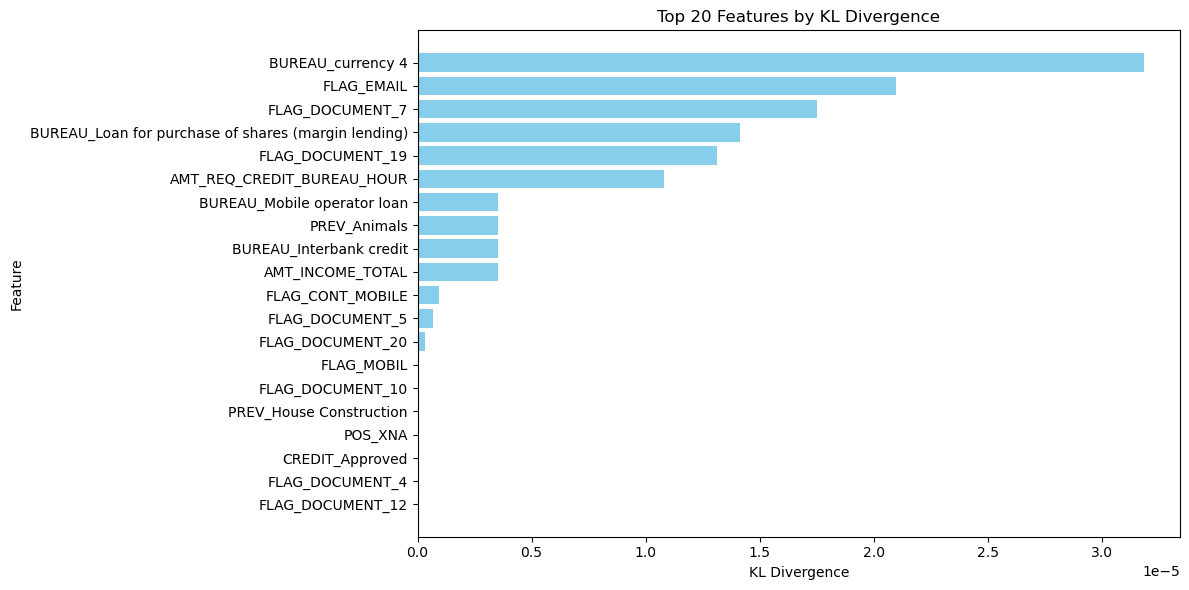

In [369]:
kl_divergence_scores_df = kl_divergence_scores_df.sort_values(by="kl_divergence")
 
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

plt.barh(
    kl_divergence_scores_df.iloc[:20]["feature"],
    kl_divergence_scores_df.iloc[:20]["kl_divergence"],
    color="skyblue"
)
plt.xlabel("KL Divergence")
plt.ylabel("Feature")
plt.title("Top 20 Features by KL Divergence")
 
plt.tight_layout()
plt.show()

## Pipeline with Top KL Divergence Scores

In [86]:
top_cols = kl_divergence_scores_df.sort_values(by="kl_divergence", ascending=False).head(25)["feature"].values.tolist()
if 'TARGET' in top_cols:
    top_cols.remove("TARGET")

In [331]:
y = transformed_df["TARGET"].copy()
X = transformed_df.drop("TARGET",axis=1).copy()
X = X[top_cols]
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
X[categorical_features] = X[categorical_features].astype(str)
models = [ DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LGBMClassifier()]
baseLogBasic = run_baseline_pipeline(X, y, 
                                    models,
                                    numerical_features= numerical_features,
                                    categorical_features=categorical_features,
                                    minority_sampling=0.5, baseLog=baseLogBasic)
baseLogBasic
 

DecisionTreeClassifier()
Train score: 0.7808079412051641
Test  score: 0.6932832544753914
AUC score:  0.5844943350562768
--------------------------------------------------
RandomForestClassifier()
Train score: 0.917510812656499
Test  score: 0.8503975415833374
AUC score:  0.7382818862808398
--------------------------------------------------
GradientBoostingClassifier()
Train score: 0.8555534779356769
Test  score: 0.8557306147667594
AUC score:  0.7569939181540171
--------------------------------------------------
AdaBoostClassifier()
Train score: 0.8448099248804917
Test  score: 0.8450807277693771
AUC score:  0.7431520306861215
--------------------------------------------------
[LightGBM] [Info] Number of positive: 19876, number of negative: 39752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4911
[LightGBM] [Info] Number of data points in the tra

Model       Time  Feautures       AUC  f1_macro  \
0      DecisionTreeClassifier   0.605249  Num  Cat   0.506331  0.497853   
1      RandomForestClassifier   5.188411  Num  Cat   0.509734  0.497965   
2  GradientBoostingClassifier   2.170258  Num  Cat   0.514411  0.486765   
3          AdaBoostClassifier   0.983702  Num  Cat   0.516042  0.484467   
4      DecisionTreeClassifier   1.438289  Num  Cat   0.584494  0.501676   
5      RandomForestClassifier  13.105396  Num  Cat   0.738282  0.603892   
6  GradientBoostingClassifier  17.797485  Num  Cat   0.756994  0.613489   
7          AdaBoostClassifier   3.912352  Num  Cat   0.743152  0.602418   
8              LGBMClassifier   2.273810  Num  Cat   0.761684  0.608665   

   f1_micro  f1_0_train  f1_1_train  f1_0_test  f1_1_test  precision_0_train  \
0  0.899046    0.950050    0.107938   0.946693   0.049012           0.922984   
1  0.896737    0.948666    0.117895   0.945399   0.050531           0.923455   
2  0.916882    0.956599    0.022564   0.956607   0.016923           0.919826   
3  0.915728    0.956046    0.019795   0.955985   0.012950           0.919650   
4  0.693283    0.864631    0.424361   0.810678   0.192673           1.000000   
5  0.850398    0.953023    0.662026   0.916371   0.291413           0.999995   
6  0.855731    0.919344    0.309182   0.919478   0.307500           0.944396   
7  0.845081    0.912870    0.290925   0.913028   0.291809           0.943200   
8  0.843357    0.915240    0.336866   0.911722   0.305608           0.950105   

   precision_1_train  precision_0_test  precision_1_test  recall_0_train  \
0           0.226622          0.920081          0.101266        0.978751   
1           0.222083          0.920017          0.097126        0.975293   
2           0.226488          0.919921          0.175299        0.996436   
3           0.168548          0.919691          0.112583        0.995441   
4           0.269326          0.937381          0.122224        0.761542   
5           0.494809          0.942825          0.235441        0.910265   
6           0.251941          0.944462          0.250509        0.895588   
7           0.230584          0.943658          0.230805        0.884430   
8           0.261725          0.946194          0.237535        0.882843   

   recall_1_train  recall_0_test  recall_1_test  Sampling  #features  
0        0.070839       0.974891       0.032330       0.5         30  
1        0.080248       0.972221       0.034148       0.5         30  
2        0.011874       0.996340       0.008891       0.5         30  
3        0.010515       0.995261       0.006870       0.5         30  
4        1.000000       0.714149       0.454839       0.5         25  
5        0.999950       0.891360       0.382299       0.5         25  
6        0.400080       0.895781       0.398060       0.5         25  
7        0.394043       0.884323       0.396646       0.5         25  
8        0.472530       0.879673       0.428369       0.5         25

# Hyperparameter Tunning

 For the hyperparameter tunning we focused on our 2 best performing models AdaBoostClassifier and GradientBoostingClassifier, both are tree based models. The best model achieved 0.61  score for f test macro and regular f test or micro 0.757, taking around 15 second to fit the whole training dataset.

In [384]:
models = [ GradientBoostingClassifier(),LGBMClassifier(), ]
 
y = transformed_df["TARGET"].copy()
X = transformed_df.drop("TARGET",axis=1).copy()
X = X[top_cols]
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
X[categorical_features] = X[categorical_features].astype(str)
 
X_train, X_test , y_train, y_test  = train_test_split( X, y, test_size=0.2, random_state=42)
estimators = [
    {
       
        'clf': [GradientBoostingClassifier(random_state=42)],
        'clf__n_estimators': [170, 200], # already tried higher
        'clf__learning_rate': [ 0.2, 0.1], # already tried 0.3 did not like it
        'clf__subsample': [0.7, 0.8], # already trie dhigher go lower
       
    },
    {
        'clf': [LGBMClassifier(random_state=42)],
        'clf___eta': [0.1,0.2 ] , 
        "clf__subsample": [0.65, 0.7 ],
        "clf__scale_pos_weight":[2.0, 1.5, 1.3],
        "early_stopping_rounds":[50],
        'clf__metric': ['auc'], 
        'verbosity': [-1],
    }   
]
try:
    experimentLog
except:
    experimentLog = pd.DataFrame(columns=[
        "Best Pipeline", "TrainAcc", "TestAcc", "AUC",
        "Recall","F1_Macro", "F1_Micro", "F1_Weighted","Precision" ,
        "Precision_Macro", "Recall_Macro",
        "Model"
    ])


for i,model in enumerate(models):
    print(f"\nRunning GridSearchCV for: {model.__class__.__name__}")
    clf_pipe = ClassifierImbalancesWithPreprocessing(numerical_features, categorical_features,0.5, model=model)
    clf_gridsearch = GridSearchCV(clf_pipe, param_grid=estimators[i], 
                                  scoring='f1_macro', cv=5, n_jobs=-1, verbose=0)
    
    
    clf_gridsearch.fit(X_train, y_train,include_numerical=True,include_categorical=True)
    
    HyperparameterFeaturesExperiments = pd.DataFrame(clf_gridsearch.cv_results_)
    display(HyperparameterFeaturesExperiments)
    clf_pipeline = clf_gridsearch.best_estimator_
    print("-" * 60)
    print(f"Best pipeline: {clf_pipeline}")
    print(f"Best model: {clf_gridsearch.best_params_}")

  
 
    y_pred_train = clf_pipeline.predict(X_train)
    y_pred_test = clf_pipeline.predict(X_test)
    y_prob_test = clf_pipeline.predict_proba(X_test)[:, 1]

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    auc = roc_auc_score(y_test, y_prob_test)
    recall = recall_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)

    f1_macro = f1_score(y_test, y_pred_test, average='macro')
    f1_micro = f1_score(y_test, y_pred_test, average='micro')
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted')
    precision_macro = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred_test, average='macro', zero_division=0)

    experimentLog.loc[len(experimentLog)] = [
    str(clf_gridsearch.best_estimator_),
    f"{train_acc*100:8.2f}%",
    f"{test_acc*100:8.2f}%",
    f"{auc:.3f}" if auc is not None else "N/A",
    f"{recall:.3f}",
    f"{f1_macro:.3f}",
    f"{f1_micro:.3f}",
    f"{f1_weighted:.3f}",
    f"{precision:.3f}",
    f"{precision_macro:.3f}",
    f"{recall_macro:.3f}",
    f"GridCV {model.__class__.__name__}"
]

experimentLog


Running GridSearchCV for: GradientBoostingClassifier


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.919856      3.299988         0.095293        0.023493   
1      19.006153      3.300777         0.096080        0.025439   
2      24.434249      2.894701         0.120077        0.041620   
3      17.323597      0.241950         0.084338        0.012604   
4      17.612904      0.596281         0.082776        0.008658   
5      21.243727      2.140104         0.079371        0.010256   
6      18.226793      3.092584         0.080503        0.007099   
7      15.752504      0.313517         0.077937        0.004206   

                                     param_clf param_clf__learning_rate  \
0  GradientBoostingClassifier(random_state=42)                      0.2   
1  GradientBoostingClassifier(random_state=42)                      0.2   
2  GradientBoostingClassifier(random_state=42)                      0.2   
3  GradientBoostingClassifier(random_state=42)                      0.2   
4  GradientBoostingClassifier(random_state=42)                      0.1   
5  GradientBoostingClassifier(random_state=42)                      0.1   
6  GradientBoostingClassifier(random_state=42)                      0.1   
7  GradientBoostingClassifier(random_state=42)                      0.1   

  param_clf__n_estimators param_clf__subsample  \
0                     170                  0.7   
1                     170                  0.8   
2                     200                  0.7   
3                     200                  0.8   
4                     170                  0.7   
5                     170                  0.8   
6                     200                  0.7   
7                     200                  0.8   

                                              params  split0_test_score  \
0  {'clf': GradientBoostingClassifier(random_stat...           0.606287   
1  {'clf': GradientBoostingClassifier(random_stat...           0.605445   
2  {'clf': GradientBoostingClassifier(random_stat...           0.606259   
3  {'clf': GradientBoostingClassifier(random_stat...           0.605633   
4  {'clf': GradientBoostingClassifier(random_stat...           0.606519   
5  {'clf': GradientBoostingClassifier(random_stat...           0.605959   
6  {'clf': GradientBoostingClassifier(random_stat...           0.607267   
7  {'clf': GradientBoostingClassifier(random_stat...           0.608000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.608752           0.613831           0.605505           0.611776   
1           0.608654           0.613732           0.605621           0.610267   
2           0.608512           0.611087           0.609143           0.609944   
3           0.609338           0.611164           0.605762           0.609242   
4           0.609316           0.612633           0.608024           0.609576   
5           0.608293           0.609527           0.610520           0.609906   
6           0.610455           0.613329           0.605497           0.612520   
7           0.610356           0.610109           0.608045           0.611467   

   mean_test_score  std_test_score  rank_test_score  
0         0.609230        0.003175                3  
1         0.608744        0.003093                7  
2         0.608989        0.001614                5  
3         0.608228        0.002177                8  
4         0.609213        0.002025                4  
5         0.608841        0.001614                6  
6         0.609814        0.003007                1  
7         0.609595        0.001363                2

------------------------------------------------------------
Best pipeline: <__main__.ClassifierImbalancesWithPreprocessing object at 0x40fe4dc70>
Best model: {'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__n_estimators': 200, 'clf__subsample': 0.7}

Running GridSearchCV for: LGBMClassifier
[LightGBM] [Info] Number of positive: 19876, number of negative: 39752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4908
[LightGBM] [Info] Number of data points in the train set: 59628, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       20.562003      2.379156         0.285745        0.129784   
1       18.946275      0.660614         0.231314        0.043193   
2       20.331876      2.365000         0.274209        0.181025   
3       19.691706      2.202939         0.223708        0.055515   
4       20.005431      2.369517         0.172474        0.045677   
5       18.010655      1.566569         0.219975        0.082976   
6       21.756917      3.080579         0.351817        0.176366   
7       18.620417      1.763504         0.204004        0.055299   
8       18.739691      1.698594         0.194812        0.067560   
9       19.814537      2.674173         0.185109        0.053392   
10      15.950488      0.427133         0.119128        0.081276   
11      14.024596      1.140226         0.043801        0.002178   

                          param_clf param_clf___eta param_clf__metric  \
0   LGBMClassifier(random_state=42)             0.1               auc   
1   LGBMClassifier(random_state=42)             0.1               auc   
2   LGBMClassifier(random_state=42)             0.1               auc   
3   LGBMClassifier(random_state=42)             0.1               auc   
4   LGBMClassifier(random_state=42)             0.1               auc   
5   LGBMClassifier(random_state=42)             0.1               auc   
6   LGBMClassifier(random_state=42)             0.2               auc   
7   LGBMClassifier(random_state=42)             0.2               auc   
8   LGBMClassifier(random_state=42)             0.2               auc   
9   LGBMClassifier(random_state=42)             0.2               auc   
10  LGBMClassifier(random_state=42)             0.2               auc   
11  LGBMClassifier(random_state=42)             0.2               auc   

   param_clf__scale_pos_weight param_clf__subsample  \
0                          2.0                 0.65   
1                          2.0                  0.7   
2                          1.5                 0.65   
3                          1.5                  0.7   
4                          1.3                 0.65   
5                          1.3                  0.7   
6                          2.0                 0.65   
7                          2.0                  0.7   
8                          1.5                 0.65   
9                          1.5                  0.7   
10                         1.3                 0.65   
11                         1.3                  0.7   

   param_early_stopping_rounds param_verbosity  \
0                           50              -1   
1                           50              -1   
2                           50              -1   
3                           50              -1   
4                           50              -1   
5                           50              -1   
6                           50              -1   
7                           50              -1   
8                           50              -1   
9                           50              -1   
10                          50              -1   
11                          50              -1   

                                               params  split0_test_score  \
0   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.606230   
1   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.606997   
2   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.607032   
3   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.606841   
4   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.605588   
5   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.608113   
6   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.610219   
7   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.605947   
8   {'clf': LGBMClassifier(random_state=42), 'clf_...           0.606820   
9   {'clf': LGBMClassifier(random_state=42

------------------------------------------------------------
Best pipeline: <__main__.ClassifierImbalancesWithPreprocessing object at 0x3402dbe80>
Best model: {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 2.0, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}


Best Pipeline   TrainAcc    TestAcc  \
0   <__main__.ClassifierImbalancesWithPreprocessin...     85.54%     85.49%   
1   <__main__.ClassifierImbalancesWithPreprocessin...     84.48%     84.54%   
2   <__main__.ClassifierImbalancesWithPreprocessin...     84.73%     84.85%   
3   <__main__.ClassifierImbalancesWithPreprocessin...     85.46%     85.50%   
4   <__main__.ClassifierImbalancesWithPreprocessin...     84.67%     84.77%   
5   <__main__.ClassifierImbalancesWithPreprocessin...     85.41%     85.31%   
6   <__main__.ClassifierImbalancesWithPreprocessin...     85.59%     85.54%   
7   <__main__.ClassifierImbalancesWithPreprocessin...     85.03%     84.52%   
8   <__main__.ClassifierImbalancesWithPreprocessin...     85.65%     85.56%   
9   <__main__.ClassifierImbalancesWithPreprocessin...     84.85%     84.31%   
10  <__main__.ClassifierImbalancesWithPreprocessin...     85.43%     85.42%   
11  <__main__.ClassifierImbalancesWithPreprocessin...     85.05%     84.53%   
12  <__main__.ClassifierImbalancesWithPreprocessin...     85.37%     85.36%   
13  <__main__.ClassifierImbalancesWithPreprocessin...     85.47%     85.47%   
14  <__main__.ClassifierImbalancesWithPreprocessin...     85.09%     84.45%   
15  <__main__.ClassifierImbalancesWithPreprocessin...     85.50%     85.38%   
16  <__main__.ClassifierImbalancesWithPreprocessin...     84.91%     84.32%   
17  <__main__.ClassifierImbalancesWithPreprocessin...     85.65%     85.58%   
18  <__main__.ClassifierImbalancesWithPreprocessin...     84.86%     84.12%   
19  <__main__.ClassifierImbalancesWithPreprocessin...     85.30%     85.27%   
20  <__main__.ClassifierImbalancesWithPreprocessin...     84.96%     84.35%   
21  <__main__.ClassifierImbalancesWithPreprocessin...     85.32%     85.30%   
22  <__main__.ClassifierImbalancesWithPreprocessin...     84.96%     84.35%   
23  <__main__.ClassifierImbalancesWithPreprocessin...     85.58%     85.52%   
24  <__main__.ClassifierImbalancesWithPreprocessin...     84.99%     84.36%   
25  <__main__.ClassifierImbalancesWithPreprocessin...     85.26%     85.29%   
26  <__main__.ClassifierImbalancesWithPreprocessin...     85.04%     84.45%   
27  <__main__.ClassifierImbalancesWithPreprocessin...     85.61%     85.63%   
28  <__main__.ClassifierImbalancesWithPreprocessin...     85.61%     85.55%   
29  <__main__.ClassifierImbalancesWithPreprocessin...     84.86%     84.44%   

      AUC Recall F1_Macro F1_Micro F1_Weighted Precision Precision_Macro  \
0   0.756  0.397    0.612    0.855       0.870     0.248           0.596   
1   0.745  0.402    0.604    0.845       0.863     0.233           0.588   
2   0.744  0.398    0.606    0.848       0.865     0.237           0.590   
3   0.756  0.400    0.613    0.855       0.870     0.250           0.597   
4   0.743  0.396    0.605    0.848       0.865     0.235           0.589   
5   0.757  0.400    0.611    0.853       0.869     0.246           0.595   
6   0.756  0.398    0.613    0.855       0.870     0.250           0.597   
7   0.763  0.436    0.612    0.845       0.864     0.243           0.595   
8   0.756  0.394    0.612    0.856       0.870     0.249           0.596   
9   0.764  0.444    0.612    0.843       0.863     0.242           0.594   
10  0.756  0.400    0.612    0.854       0.869     0.248           0.596   
11  0.764  0.435    0.612    0.845       0.864     0.243           0.595   
12  0.756  0.402    0.612    0.854       0.869     0.248           0.596   
13  0.757  0.403    0.614    0.855       0.870     0.250           0.597   
14  0.765  0.434    0.611    0.844       0.864     0.241           0.594   
15  0.756  0.394    0.610    0.854       0.869     0.245           0.595   
16  0.762  0.433    0.610    0.843       0.863     0.239           0.593   
17  0.756  0.393    0.612    0.856       0.870     0.249           0.597   
18  0.762  0.438    0.609    0.841       0.862     0.237           0.592   
19  0.756  0.405    0.612    0.853       0.868     0.247           0.5

In [400]:
HyperparameterFeaturesExperiments.sort_values("rank_test_score")
pd.set_option('display.max_colwidth', None)
experimentLog[["Model","AUC","Recall","F1_Macro", "Best Pipeline"]].sort_values(by="AUC", ascending=False)

Model    AUC Recall F1_Macro  \
29              GridCV LGBMClassifier  0.765  0.439    0.612   
22              GridCV LGBMClassifier  0.765  0.434    0.610   
14              GridCV LGBMClassifier  0.765  0.434    0.611   
11              GridCV LGBMClassifier  0.764  0.435    0.612   
9               GridCV LGBMClassifier  0.764  0.444    0.612   
24              GridCV LGBMClassifier  0.763  0.434    0.610   
7               GridCV LGBMClassifier  0.763  0.436    0.612   
26              GridCV LGBMClassifier  0.763  0.434    0.611   
20              GridCV LGBMClassifier  0.763  0.436    0.611   
18              GridCV LGBMClassifier  0.762  0.438    0.609   
16              GridCV LGBMClassifier  0.762  0.433    0.610   
5   GridCV GradientBoostingClassifier  0.757  0.400    0.611   
13  GridCV GradientBoostingClassifier  0.757  0.403    0.614   
23  GridCV GradientBoostingClassifier  0.756  0.392    0.611   
25  GridCV GradientBoostingClassifier  0.756  0.401    0.612   
21  GridCV GradientBoostingClassifier  0.756  0.405    0.612   
27  GridCV GradientBoostingClassifier  0.756  0.392    0.613   
19  GridCV GradientBoostingClassifier  0.756  0.405    0.612   
0   GridCV GradientBoostingClassifier  0.756  0.397    0.612   
17  GridCV GradientBoostingClassifier  0.756  0.393    0.612   
12  GridCV GradientBoostingClassifier  0.756  0.402    0.612   
10  GridCV GradientBoostingClassifier  0.756  0.400    0.612   
8   GridCV GradientBoostingClassifier  0.756  0.394    0.612   
6   GridCV GradientBoostingClassifier  0.756  0.398    0.613   
3   GridCV GradientBoostingClassifier  0.756  0.400    0.613   
15  GridCV GradientBoostingClassifier  0.756  0.394    0.610   
28  GridCV GradientBoostingClassifier  0.755  0.393    0.612   
1           GridCV AdaBoostClassifier  0.745  0.402    0.604   
2           GridCV AdaBoostClassifier  0.744  0.398    0.606   
4           GridCV AdaBoostClassifier  0.743  0.396    0.605   

                                                             Best Pipeline  
29  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3402dbe80>  
22  <__main__.ClassifierImbalancesWithPreprocessing object at 0x398734e50>  
14  <__main__.ClassifierImbalancesWithPreprocessing object at 0x366350100>  
11  <__main__.ClassifierImbalancesWithPreprocessing object at 0x36bf67b50>  
9   <__main__.ClassifierImbalancesWithPreprocessing object at 0x36bf54b80>  
24  <__main__.ClassifierImbalancesWithPreprocessing object at 0x347a3e280>  
7   <__main__.ClassifierImbalancesWithPreprocessing object at 0x3f9ca6ee0>  
26  <__main__.ClassifierImbalancesWithPreprocessing object at 0x36639a670>  
20  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3ffeda610>  
18  <__main__.ClassifierImbalancesWithPreprocessing object at 0x40f85fa00>  
16  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3ffa14640>  
5   <__main__.ClassifierImbalancesWithPreprocessing object at 0x3898c14c0>  
13  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3f9ea7640>  
23  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3ffeb15b0>  
25  <__main__.ClassifierImbalancesWithPreprocessing object at 0x415229fa0>  
21  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3fa3d3d60>  
27  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3fa18a730>  
19  <__main__.ClassifierImbalancesWithPreprocessing object at 0x3fa607730>  
0   <__main__.ClassifierImbalancesWithPreprocessing object at 0x38987a040>  
17  <__main__.ClassifierImbalancesWithPreprocessing object at 0x437b93ee0>  
12  <__main__.ClassifierImbalancesWithPreprocessing object at 0x366cff970>  
10  <__main__.ClassifierImbalancesWithPreprocessing object at 0x414bbd040>  
8   <__main__.ClassifierImbalancesWithPreprocessing object at 0x3fa460b80>  
6   <__main__.ClassifierImbalancesWithPreprocessing object at 0x3f9ca6b20>  
3   <__main__.ClassifierImbalancesWithPreprocessing object at 0x38982a820>  
15  <__main__.ClassifierImbalancesWithPreproc

# Evaluation metrics
As mentioned before we will focus on area on under the curve, recall-macro and f_test macro

In [402]:
HyperparameterFeaturesExperiments.sort_values("rank_test_score")[["param_clf","params"]]

param_clf  \
7   LGBMClassifier(random_state=42)   
5   LGBMClassifier(random_state=42)   
9   LGBMClassifier(random_state=42)   
6   LGBMClassifier(random_state=42)   
10  LGBMClassifier(random_state=42)   
2   LGBMClassifier(random_state=42)   
3   LGBMClassifier(random_state=42)   
8   LGBMClassifier(random_state=42)   
11  LGBMClassifier(random_state=42)   
0   LGBMClassifier(random_state=42)   
1   LGBMClassifier(random_state=42)   
4   LGBMClassifier(random_state=42)   

                                                                                                                                                                                  params  
7    {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 2.0, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
5    {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.3, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
9    {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.5, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
6   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 2.0, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}  
10  {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.3, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}  
2   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.5, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}  
3    {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.5, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
8   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.5, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}  
11   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.2, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.3, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
0   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 2.0, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}  
1    {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 2.0, 'clf__subsample': 0.7, 'early_stopping_rounds': 50, 'verbosity': -1}  
4   {'clf': LGBMClassifier(random_state=42), 'clf___eta': 0.1, 'clf__metric': 'auc', 'clf__scale_pos_weight': 1.3, 'clf__subsample': 0.65, 'early_stopping_rounds': 50, 'verbosity': -1}

In [409]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
y = transformed_df["TARGET"].copy()
X = transformed_df.drop("TARGET",axis=1).copy()
X = X[top_cols]
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

X[categorical_features] = X[categorical_features].astype(str)

X_train, X_test , y_train, y_test  = train_test_split( X, y, test_size=0.2, random_state=42)
 
model = LGBMClassifier(eta= 0.2, scale_pos_weight=1.5, subsample=0.65 , metric="auc", verbosity=-1 )
 
clf = ClassifierImbalancesWithPreprocessing(numerical_features, categorical_features,0.5, model=model)
start = time.time() 
clf.fit(X_train, y_train)
end = time.time() 
print(f"Elapsed time: {end - start:.4f} seconds")
y_test_pred = clf.predict(X_test)


Elapsed time: 1.9535 seconds


<Figure size 500x400 with 0 Axes>

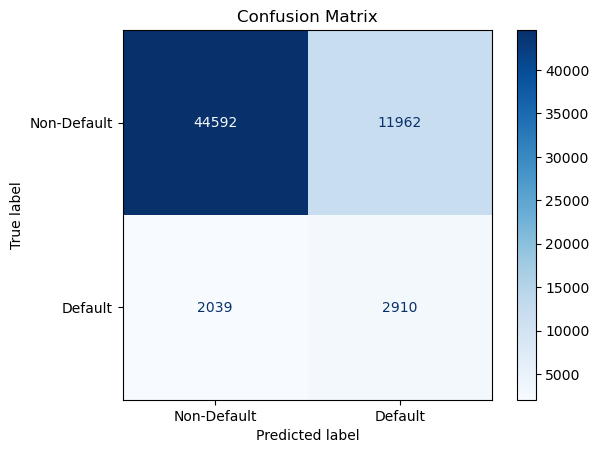

In [410]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Default", "Default"])
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix")
plt.grid(False)
plt.show()


# Gap Analysis on Features Through Native Functions
Figure 1 is given by how many times each feature was used to split a tree node across all boosting rounds, as we can see bureau_ACTIVE  is the top ranked feature, bureau active is given by the fraction of a client's external bureau account whose status are active, and is the most relevant by a long range, this feature is relavant since lots of active accounts increase repayment obbligations which might lead to higher default risk. The second feature defines the fraction of past applications submitted in person, the third average day each installment was due, and the fourth whether the applicant's previous aplication was accepted or declined. As we can see the applicant's application history might play a really big factor on whether they default or not, and what is perhaps most surprising is the fact that it comes before the the applicant's demographics.

Sklearns native function permutation allows us to see how much the performance of a model would decrease without a certain feature, that percentage decrease can be seen in the second figure  were we can see performance decreases the most with external source two which is almost last according to the top most important features given by the number of splits.

[Text(0, 0, 'CREDIT_TERM'),
 Text(0, 1, 'DAYS_BIRTH'),
 Text(0, 2, 'EXT_SOURCE_2'),
 Text(0, 3, 'AMT_CREDIT'),
 Text(0, 4, 'EXT_SOURCE_3'),
 Text(0, 5, 'EXT_SOURCE_1'),
 Text(0, 6, 'DAYS_EMPLOYED'),
 Text(0, 7, 'AMT_GOODS_PRICE'),
 Text(0, 8, 'PREV_DAYS_DECISION'),
 Text(0, 9, 'DEBT_CREDIT_RATIO'),
 Text(0, 10, 'REGION_POPULATION_RELATIVE'),
 Text(0, 11, 'DAYS_LAST_PHONE_CHANGE'),
 Text(0, 12, 'INSTA_DAYS_ENTRY_PAYMENT'),
 Text(0, 13, 'PREV_Refused'),
 Text(0, 14, 'CREDIT_CNT_DRAWINGS_ATM_CURRENT'),
 Text(0, 15, 'BUREAU_Closed'),
 Text(0, 16, 'PREV_Approved'),
 Text(0, 17, 'INSTA_DAYS_INSTALMENT'),
 Text(0, 18, 'PREV_walk-in'),
 Text(0, 19, 'BUREAU_Active')]

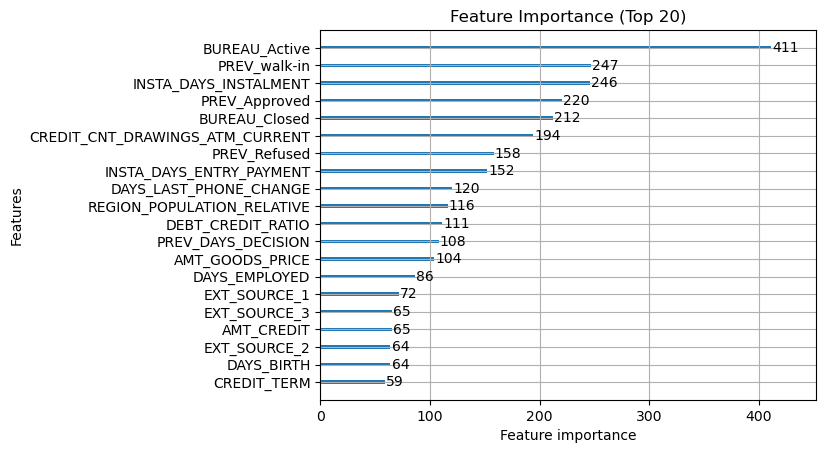

In [392]:
from lightgbm import plot_importance

plot_importance(clf.pipeline.named_steps['clf'], max_num_features=20, importance_type='split')   
plt.title("Feature Importance (Top 20)")
ax = plt.gca()
ax.set_yticklabels(X_train.columns[model.feature_importances_.argsort()[::-1][:20]])
  

In [395]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=clf.pipeline.named_steps['clf'], 
    X=X_train,
    y=y_train,
    n_repeats=10,               
    scoring='roc_auc',        
    random_state=42,
    n_jobs=-1                 
)

In [397]:
perm_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values(by="importance_mean", ascending=False)

display(perm_df.head(20))

feature  importance_mean  importance_std
1                       EXT_SOURCE_2         0.042662        0.000801
11   CREDIT_CNT_DRAWINGS_ATM_CURRENT         0.022316        0.000549
10                 DEBT_CREDIT_RATIO         0.015017        0.000582
3                       EXT_SOURCE_1         0.014678        0.000806
13                      PREV_walk-in         0.013309        0.000537
0                       EXT_SOURCE_3         0.006230        0.000877
16          INSTA_DAYS_ENTRY_PAYMENT         0.004821        0.000531
8                      BUREAU_Active         0.004807        0.000289
24  CREDIT_CNT_INSTALMENT_MATURE_CUM         0.004147        0.000524
22       CREDIT_CNT_DRAWINGS_CURRENT         0.002945        0.000404
12                   AMT_GOODS_PRICE         0.000008        0.000061
7                      PREV_Approved         0.000000        0.000000
5                         DAYS_BIRTH         0.000000        0.000000
14                        AMT_CREDIT         0.000000        0.000000
15       REGION_RATING_CLIENT_W_CITY         0.000000        0.000000
20                        PREV_SCOFR         0.000000        0.000000
21              REGION_RATING_CLIENT         0.000000        0.000000
23        REGION_POPULATION_RELATIVE         0.000000        0.000000
2                        CREDIT_TERM        -0.000002        0.000008
17             INSTA_DAYS_INSTALMENT        -0.000149        0.000064

In [407]:
!pwd

/Users/zashabenites/Documents/IU/csci_p_556/project_on_own


# Submission
## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [418]:
from sklearn.ensemble import AdaBoostClassifier


 
X_id = transformed_df.drop("TARGET",axis=1).copy()
X_id = X_id["SK_ID_CURR"]
 

_, x_id , _, _  = train_test_split( X_id , y, test_size=0.2, random_state=42)
display( X_id.head(5) )

kaggle_probs = clf.predict_proba(X_test)[:, 1]

# ✅ Format submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR":x_id,
    "TARGET": kaggle_probs
})



# ✅ Retrain AdaBoost on full training data (train + valid + test)
X_full_train = pd.concat([X_train,  X_test])
y_full_train = pd.concat([y_train,  y_test])


X = datasets["application_train"].copy()
X = X.drop(["TARGET","LOG_AMT_INCOME_TOTAL"], axis=1)
numerical_features =  X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
y = datasets["application_train"]["TARGET"].copy()
print(y.shape)
print(X.shape)
# ✅ Format submission DataFrame
clf = ClassifierImbalancesWithPreprocessing(numerical_features, categorical_features,0.5, model=model)
clf.fit(X, y)



submission = submission.iloc[:48744,:]
# ✅ Save submission file
submission.to_csv("submission_adaboost_.csv", index=False)
print("✅ AdaBoost submission file saved as 'submission_adaboost.csv'")

0    100002
1    100003
2    100004
3    100006
4    100007
Name: SK_ID_CURR, dtype: int64

✅ AdaBoost submission file saved as 'submission_adaboost.csv'


In [448]:


X_test = datasets["application_test"]
#X_test_ = X_test.drop(["LOG_AMT_INCOME_TOTAL" ], axis=1)



# ✅ Predict probabilities for Kaggle test set
kaggle_probs = clf.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    "SK_ID_CURR": datasets["application_test"]["SK_ID_CURR"]      , #  X_test["SK_ID_CURR"].values,
    "TARGET": kaggle_probs
})
submission = submission.iloc[:48744,:]


# ✅ Save submission file
submission.to_csv("submission_adaboost.csv", index=False)
print("✅ AdaBoost submission file saved as 'submission_adaboost.csv'")

✅ AdaBoost submission file saved as 'submission_adaboost.csv'


In [450]:
#! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

!kaggle competitions submit -c home-credit-default-risk -f submission_adaboost.csv -m "AdaBoost baseline submission"


100%|██████████████████████████████████████| 1.23M/1.23M [00:00<00:00, 3.11MB/s]
Successfully submitted to Home Credit Default Risk

In [133]:
datasets.keys()

dict_keys(['application_test', 'POS_CASH_balance', 'credit_card_balance', 'installments_payments', 'application_train', 'bureau', 'previous_application', 'bureau_balance', 'sample_submission'])

In [399]:

# ✅ Retrain AdaBoost on full training data (train + valid + test)
X_full_train = pd.concat([X_train, X_valid, X_test])
y_full_train = pd.concat([y_train, y_valid, y_test])

ada_pipeline = Pipeline([
    ("preparation", data_prep_pipeline),
    ("classifier", AdaBoostClassifier(n_estimators=100, random_state=42))
])

ada_pipeline.fit(X_full_train, y_full_train)

# ✅ Predict probabilities for Kaggle test set
kaggle_probs = ada_pipeline.predict_proba(X_kaggle_test)[:, 1]


'/Users/zashabenites/Documents/IU/csci_p_556/project_on_own'

# Kaggle submission via the command line API

## Report Submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

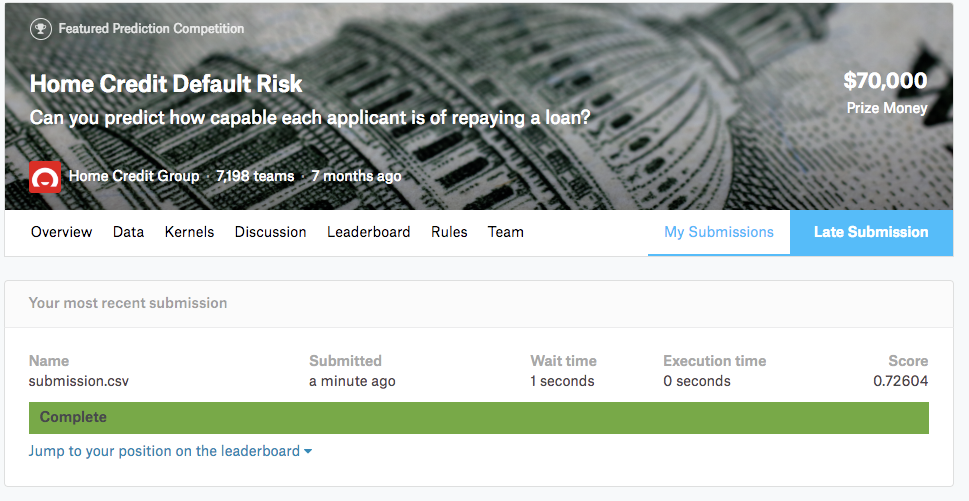

In [446]:
X_test["SK_ID_CURR"]

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [412]:
!kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "AdaBoost baseline submission"
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate() 

Traceback (most recent call last):
  File "/opt/anaconda3/envs/scikit1temp/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/anaconda3/envs/scikit1temp/lib/python3.8/site-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/opt/anaconda3/envs/scikit1temp/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/zashabenites/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [447]:
# ✅ Format submission DataFrame
submission = pd.DataFrame({
    "SK_ID_CURR": datasets["application_test"]["SK_ID_CURR"],
    "TARGET": kaggle_probs
})

submission 

SK_ID_CURR    TARGET
0          100001  0.155355
1          100005  0.342233
2          100013  0.120625
3          100028  0.178123
4          100038  0.590292
...           ...       ...
48739      456221  0.181866
48740      456222  0.433093
48741      456223  0.188542
48742      456224  0.374533
48743      456250  0.732409

[48744 rows x 2 columns]

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 

# Project Title: Home Credit Default Risk (HCDR) - FP_Group4_HCDR

## Authors
| Name                     | Email                | Photo                      |
|--------------------------|----------------------|-----------------------------|
| Snekha Senthilkumar      | snesent@iu.edu       | <img src="snekha.png" width="100"/> |
| Farnaz Asrari            | fasrari@iu.edu       | <img src="farnaz.png" width="100"/> |
| Zasha Michelle Benites Mendez  | mbenites@iu.edu      | <img src="michelle.png" width="100"/> |
| Amy Stafford             | amystaff@iu.edu      | <img src="amy.png" width="100"/> |

## Abstract

This project explores the use of machine learning models to predict credit default risk using the Home Credit Default Risk dataset. After conducting extensive exploratory data analysis (EDA), we engineered features by aggregating secondary tables and enriching the primary application data. We trained and evaluated several baseline models, including Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, LightGBM and Decision Trees. Since there was a significant imbalance in the distribution of the target value we focused on AUC and macro scores. After some feature selection and engineering we were able to reduce our number of features from more than 300 to 25, achieving similar or even better results. Following the testing of the base models, we implemented applied feature engineering to generate feature from the secondary datasets. The feature engineering consisted mostly on generating ratios between the different features and the calculation of RFM scores. After the feature engineering we did not see a significant improvement from the base model. However, it is worth noting that after applying feature selection techniques, such as selecting features identified as most important by the Random Forest classifier, those with the highest absolute coefficients from the Logistic Regression classifier, or those with the highest KL divergence relative to the positive class of the target variable, we achieve similar or even better performance. The best performing models were all tree-based models, particularly the boosted trees. Finally, during the hyperparameter tuning we were able to improve the score of our best models, the AUC score reaching 0.76 and a better balance between precision and recall as shown by our F1 scores.

 
## Introduction

The ability to accurately assess creditworthiness is critical for financial institutions aiming to minimize risk while extending loans to customers. The Home Credit Default Risk competition hosted on Kaggle provides a rich dataset containing both application-level and behavioral data, offering an ideal setting for developing and evaluating machine learning models for credit risk prediction. In this phase of our project, we aim to build baseline models and investigate their performance using various evaluation metrics. We start by performing feature engineering on the main application table and one promising secondary datasets, then train a series of classification models to predict default. Our goal is not only to identify the most promising modeling approaches but also to surface the limitations of conventional evaluation strategies when dealing with class imbalance.

## Dataset

In this project, we explored a comprehensive financial dataset provided by the Home Credit Default Risk challenge. The data consists of a primary application file—application_train.csv—which contains demographic, income, and credit-related information for each loan applicant, along with a binary target variable indicating default risk. To enrich our predictive modeling, we studied six additional linked datasets capturing both internal and external financial behavior. These included bureau and bureau_balance, which detail historical credit data from other institutions, and previous_application, which records clients’ past loans with Home Credit. We also examined three time-series datasets—credit_card_balance, installments_payments, and POS_CASH_balance—which provide month-by-month insights into clients’ repayment habits, credit card usage, and point-of-sale loan performance. Understanding each dataset’s structure, its relationship to the main table, and its potential for feature engineering was essential to building a robust prediction pipeline. However, the one imortant steo before feauture engineering is exploring datasets deeper which we lay out in next section.

## EDA

To better understand the problem of loan default prediction, we started by exploring all the datasets provided in the competition. The main dataset (application_train.csv) contains demographic and financial details of each applicant at the time of loan application. Our target variable is binary, where 1 means the person defaulted on the loan. We noticed that the dataset is imbalanced, with most applicants not defaulting.

We began by checking basic correlations between numerical features and the target. The EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 variables stood out as having the strongest (negative) correlation with default, which makes sense because they reflect external credit scores. These variables were also clearly separated in KDE plots when split by repayment status (Refer to Diagram 1). Other features like age (calculated from DAYS_BIRTH) and region ratings had weaker but still noticeable associations with the target. Among categorical variables, features like education type, gender, and income type showed significant differences in default rates, according to ANOVA F-tests.
![Alt Text](Diagram1.png)

We also looked into the bureau and bureau_balance tables, which give insight into each applicant’s credit history from other institutions. Most records in bureau were for loans that were already closed, but a sizable portion were still active. The most common loan types reported were consumer credit and credit cards. From DAYS_CREDIT, we saw that most of the external loans were taken out within the past 1000 days. The bureau_balance table showed the monthly status of those loans, and we observed that most loans had relatively short monthly histories and that delinquency (non-zero STATUS) was uncommon.

Next, we explored previous_application, which stores details of applicants’ past loan applications with Home Credit. Most of these were approved, but a fair number were either canceled or refused. We saw that people generally received close to what they applied for (AMT_APPLICATION vs AMT_CREDIT), and the loan purposes were mostly missing or unspecified, but among the known ones, consumer-related needs were common. The distribution of DAYS_DECISION showed that most past applications happened within the last few years. Interestingly, while most applicants had only a few previous applications, we found a small group with 40 or more, which could be an indicator of risk or credit-seeking behavior.

For the POS_CASH_balance dataset, we observed that most contracts were still active, and the number of monthly records per loan was generally low, with few loans extending beyond 20 months. The SK_DPD and SK_DPD_DEF columns, which track overdue days with and without grace periods, were zero in almost all cases. This suggests that most POS loans are being repaid on time. Also, the number of remaining installments (CNT_INSTALMENT_FUTURE) was small for most records.

Finally, we explored installments_payments, which tracks historical installment payments. We created a DAYS_LATE column to compare scheduled vs actual payment dates and found that most payments were made early or on time. The scatter plot of planned vs actual payment amounts confirmed that most clients paid exactly what was expected, though there were a few cases of over- or under-payment. The total number of installments per loan also followed a right-skewed distribution, with most loans having under 50 installments.

## Feature Engineering and transformers

For the feature engineering, for most categorical variable we developed a pipeline that took all the datasets and applied transformations and finally joined them on the unique applicant's id. From the apllication dataset we target-econded the categorical variables, obtaining the mean encoding, that is the probability of the aplicant defaulting(TARGET=1). We also derived ratio features, since as seen in our EDA most of the features overlapped and there was no clear separation between the TARGET=1 and TARGET=0. On the credit card balance dataset we computed the Recency Frequency and Monetary scores, by binning based on quartiles the following:  the time passed since the most recent transaction of the applicant using their credit card(Recency), the number of times the applicants unique id appeared on the dataset (Frequency) and the total balance (sum of the AMT_BALANCE column) (Monetary). From the bureau dataset we obtained the number of loans the applicant had previously taken and applied target encoding on the categorical variables. We also calculated other ratios we thought relevant such as debt to credit ratio and the ratio of overdue debt. 

From the bureau balance dataset we obtained the the average of how much time a loan was past due, the fraction of months with loans and the fraction of months with no loans. Finally the previous application dataset we counted how many times the applicant had previously applied, and then for both the previous application dataset and the POS Cash Balance Dataset we performed the same feature engineering:   grouped the instances by the applicant's unique id and aggregated the continuous' variables mean for each feature while for the categorical we one hot encoded them before obtaining their mean and adding it to the dataset.

![Alt Text](NumberOfPreviousPerApplicant.png)

 
## Pipelines

We counstructed two pipeline, one for handling the aforementioned feature engineering and another one, our main pipeline to train our model. The class ClassifierImbalancesWithPreprocessing is a wrapper for our main pipleine that take tabular data and allows us to fit transform and predict with any chosen model, which aided a lot in the experiment. The pipeline is initialized with our numeric and categorical columns, our estimator of choice as well as a minority class-ratio that will balance our target variable during training dropping instances to match the desired ratio only during training as per ImbPipeline's documentation. Our main pipeline wrapped within the class has preprocessing pipeline consisting of a column transformer that handles missing numeric variables through imputing with the median and then standardizes them alongside the rest of the numerical features, while for the categorical variables it imputes with a constant token and then one hot encodes them. 

Once the feature matrix is cleaned and encoded the aforementioned class imbalance is handled with RandomUnderSampler belong that discard a random subset of the majority class to match the minority class-ratio parameter, only if the model is being fitted, else it is ignored. Finally our feature matrix is fed to our model which is a cloned of the originally given model to avoid data leakage.

The wrapper also has another helpful custom method that makes a classification report for both the training and test sets and returns the macro and micro‑averaged F1 scores together with per‑class precision, recall and F1 values which are to be used by most of our experiment Logs to assess model performance

## Experimental Results  

We built an initial benchmark for our model by training solely the test dataset on it, 121 features, without further engineering the features. We measured their  Gaussian Naie Bayes, Decision Trees, Random Forests, Gradient Boosted Decision Trees and AdaBoost we measured their performance through AUC, F1 precision and Recall.

GaussianNB yileded the poorest AUC score (0.57) and macro-F1(0.18), decision trees improved the accuracy but they did not manage to impeove AUC score and showed overfitting(train = 0.78, test = 0.69). However this models also took the least amount of time to train which is significant compared to how much time some of the better performing models took. 

The best performing models were Ensemble models; RandomForests achieved an AUC of 0.73 and macro f-1 of 0.61, Gradient Boosting had the ighest AUC(0.753) and macro F-1 but also took the longest by a significant amount of time() .AdaBoost achieved slightly lower scores than GradientBoosted (AUC=0.74 & macro F-1 =60)trees but in a much lower timeframe(). THe lowest scores were consistently precision and recall howvered aroun 30% however another concern was the time it took to train these models.

Due to the high amount of time it took to train the model we performed feature selection using both Logistic Regression and RandomForests, while both seemingly different features, they overlapped, but differed significantly in order, it is worth noting that logistic regression also chose many onehotencoded features belonging to the same initial features. With these features we were able to a train our models of 21 features. These smaller subset of predictors preserved most of the initial model's quality increasing or decreasing miniminally model performance when it came to AUC, which was important to take into consideration when performing feature engineering. This feature selection revealed that the models could be made more cost efficient for our best performing models.

 
After the feature engineering we performed another feature selection techinique, kl divergence, obtaining the features with the highest ditribution difference between both values of the target variable. Again this allowed us to reduce our number of variables to 25 where there was an improvement in performance however it was not that significant. This time around seeing the performance of our ensemble models we added LightGBM as an additional model, which was the new best performing models. The improvement in all estimators was small however it was significant for the f-1 test cores(the score of our minority class). Again Gradient Boosted took the most time however as mentioned before LGBM performed best taking around 2.27 second to train and achieving a 0.76 AUC score.

We finetunned both LGBM and GradientBoosted Trees, with LGBM outperforming GradientBoosted Trees again, recall scores rose to 43-44 % and the AUC score increased to 0.765 and f1-macro rising to 0.611. There was not significant improvement after finetunning. The best popeline had a learning rate of 0.1, a subsample rate (row- sampling(bagging)) of  0.65, and applied further balancing thorugh the parameter scale pos weight.  
 
![Alt Text](Results.png)


## Discussion

In this phase we established a comprehensive pipeline to easily train and test our data. Our primary objectives were to reduce the overalll training time of the models and remedy the previous low precision and recall scores. Across all iterations of the testing ensemble methods outperformed the others with LBGM performing the best both in time (2s) and our chosen metrics (AUC=0.765 & f1-macro = 0.611).  Its histogram optimization methods athat reduce training times is an ideal property for large tabular data however it brings into question whether further preprocessing could have been done. Perhaps it could be interesting to observe more the interaction between features than against the target data. 

This phase demonstrate that the model could can achieve comparable performance using fewer features improving training times, without reducing model quality. Although precision and recall saw significant improvement they could still be worked on, exploring more feature interactions would perhaps be interestomg try and find subspaces in which predictors exhibit clear separation between target classes.
 
 

## Future work

In the next phase, we will focus on training a deep neural network or multilayer perceptron using pytorch and our feature engineered data to classify our target variables, this will prove as an interesting benchmark for our current model and perhaps even bring into view the limitations of tree such as fixed feature s[ace or its inability to automatically learn latent representations. Neural network's ability to see subtle feature interactions that tree based models may miss may potentitally inrease out current scores. We will try to build a regression model using again multilayer perceptrons as well. 
 

 
## Conclusion
This paper outlines our training and evaluationof several machine learning models to develop an imbalance aware modelling pipeline on the Home Credit Default Risk Dataset from the Kaggle COmpetition. Our experiments show that the entire dataset is not necessary to achieve a fgood performance; however there is still room for improvement in the f1 macro scores, in this ocasion we prioritized recall over precision since it is infered that a bank would rather avoid denying a person a loan rather than losing money. After performing hyperparameter tunning and feature engineering our best performing model was LightGBM (AUC=0.76 & macro F1 =0.61) which took 2 seconds to train, while the f1 and AUC score did not improve much the difference between the training and testing score improved a significantly which revealed we improved the overfitting. 
 
## Appendix

## Kaggle Submission
A screenshot of your best kaggle submission. 
![Alt Text](submissionKaggle.png)
The screenshot should show the different details of the submission and not just the score.

## Team and Plan updates


### Table 1: Phase Leader Plan

| Phase | Tasks  | Leader |
|:--------:|:--------:|:--------:|
|  1  |  Project description, data, metrics, baseline models & pipeline, and other planned pipelines  |  Snekha Senthilkumar  |
|  2  |  Grab data, EDA, metrics, baseline models, report, feature engineering + hyperparameter tuning, video presentation, slides, notebook  |  Farnaz Asrari  |
|  3  |  Baseline models, feature engineering + hyperparameter tuning, additional feature selection, ensemble methods, video presentation, slides, notebook  |  Michelle Benites Mendez  |
|  4  |  Implement a neural network, advanced model architectures and loss functions, final report, video presentation, slides, notebook  |  Amy Stafford  |





## Machine Learning Algorithms and Metrics

In this project, we implemented and compared several supervised learning models to predict the probability of credit default. We began with a logistic regression baseline and extended the analysis to include tree-based models such as Decision Trees, Random Forest, Gradient Boosting, and AdaBoost. Each model was evaluated using accuracy, AUC, and additional metrics such as precision, recall, and F1-score, which are essential in imbalanced classification tasks.

---

### Logistic Regression

Logistic Regression is a simple yet effective classification model that estimates the probability that a client will default. It is suitable for binary classification problems and serves as a strong baseline. We implemented it using `sklearn.linear_model.LogisticRegression`. The loss function minimized during training is the **Binary Cross-Entropy (Log Loss)**.

---

### Decision Tree Classifier

Decision Trees work by recursively splitting the data into subgroups to improve classification purity. We implemented them using `sklearn.tree.DecisionTreeClassifier`. The impurity at each node is calculated using one of the following criteria.

---

### Random Forest

Random Forests are an ensemble of decision trees, trained on bootstrapped subsets of the data and using random subsets of features at each split. They help reduce overfitting and improve generalization. We used `sklearn.ensemble.RandomForestClassifier'.

---

### Gradient Boosting & AdaBoost

Both are ensemble methods that build models sequentially. Gradient Boosting minimizes a loss function by correcting previous errors using gradient descent, while AdaBoost adjusts the weights of misclassified instances to focus more on hard cases. These models were implemented using `GradientBoostingClassifier` and `AdaBoostClassifier`.

---

### LightGBM
LightGBM is a fast, histogram‑based gradient boosting framework that grows trees leaf‑wise for lower loss, implemented via `lightgbm.LGBMClassifier`.  

---

### Evaluation Metrics

Given the **imbalanced nature of the dataset**, relying solely on accuracy would be misleading. We therefore incorporated the following metrics:

- **Accuracy**: Proportion of correctly predicted observations:
  $$
  Accuracy = \\frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**: Proportion of predicted positives that are actually positive:
  $$
  Precision = \\frac{TP}{TP + FP}
  $$

- **Recall (Sensitivity)**: Proportion of actual positives that are correctly predicted:
  $$
  Recall = \\frac{TP}{TP + FN}
  $$

- **F1 Score**: Harmonic mean of precision and recall. Balances false positives and false negatives:
  $$
  F1 = 2 \\times \\frac{Precision \\times Recall}{Precision + Recall}
  $$
- **Macro‑F1 Score**: Unweighted average of per‑class F1 scores, giving each class equal importance:  
  $$
  F1_c = 2 \times \frac{\mathrm{Precision}_c \times \mathrm{Recall}_c}{\mathrm{Precision}_c + \mathrm{Recall}_c}
  $$  
  $$
  \mathrm{Macro\!-\!F1} = \frac{1}{K} \sum_{c=1}^{K} F1_c
  $$

- **ROC-AUC**: Measures the ability of the model to distinguish between classes. AUC represents the area under the ROC curve, plotting true positive rate against false positive rate.

- **Confusion Matrix**: A matrix showing actual vs. predicted values.

These metrics provide a more holistic view of model performance, especially in detecting defaulters—our minority class of interest.



# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


Adarsh, S. (2019, August 31). Home Credit Default Risk — Part 1: Business Understanding, Data Cleaning and EDA. Analytics Vidhya on Medium. https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/